# Lab 1a

## Fix data

In [55]:
import numpy as np
from helper_functions import mse

n = 100
mA = [1.0, 0.3]
mB = [-4.0, 0.0]
sigmaA = 0.8
sigmaB = 0.5

np.random.seed(42)

classA = np.random.randn(n, 2) * sigmaA + mA
classB = np.random.randn(n, 2) * sigmaB + mB

classA = classA.transpose()
classB = classB.transpose()

In [56]:
print(classA.shape)

(2, 100)


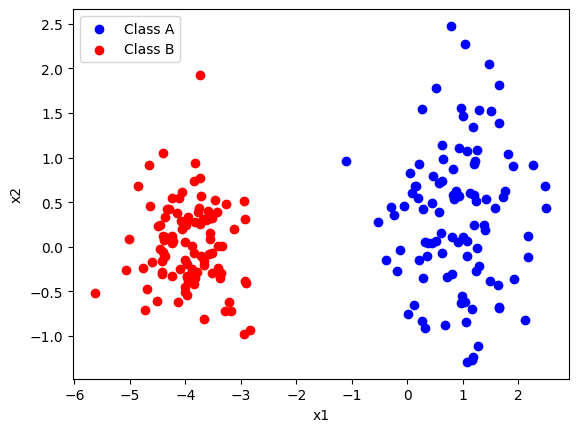

In [57]:
import matplotlib.pyplot as plt

plt.scatter(classA[0, :], classA[1, :], color="blue", label="Class A")
plt.scatter(classB[0, :], classB[1, :], color="red", label="Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [58]:
# Create input data, with bias term (one extra dimension)
classABias = np.concatenate((classA, np.ones((1, n))), axis=0)
classBBias = np.concatenate((classB, np.ones((1, n))), axis=0)

# This is our input data (2 classes, with 2 dimensions for visualizatio in 2D plane + 1 deminsion for the bias term)
patterns = np.concatenate((classABias, classBBias), axis=1)

# Create shuffled indices. Will be used to shuffle the samples
shuffled_indices = np.random.permutation(patterns.shape[1])

# Shuffle Input data
patterns_shuffled = patterns[:, shuffled_indices]

# Target data (delta rule)
targetsDelta = np.concatenate((np.ones(classA.shape[1]), -np.ones(classB.shape[1])))
targetsDelta_shuffled = targetsDelta[shuffled_indices] # Shuffle targets

# Target data (perceptron rule)
targetsPerc = np.concatenate((np.ones(classA.shape[1]), np.zeros(classB.shape[1])))
targetsPerc_shuffled = targetsPerc[shuffled_indices] # Shuffle targets

In [59]:
def plot_classifier(ClassA, ClassB, w):
    slope = -w[0, 0]/w[0, 1]  #The slope of the boundary

    # Handle 2 cases: with and without bias term
    if w.shape[1] == 3:
        # With bias term we solve for y' = w0*x0 + w1*x1 + w2*1 = 0
        constant_term = -w[0, 2]/w[0, 1] #The constant term of the linear equation
    else:
        # Without bias term we solve for y' = w0*x0 + w1*x1 = 0
        constant_term = 0


    boundary_x = np.linspace(min(classA[1, :].min(), classB[1, :].min()), max(classA[1, :].max(), classB[1, :].max()), num=100, endpoint=True, retstep=False, dtype=None, axis=0)
    boundary_y = slope * boundary_x + constant_term


    plt.scatter(ClassA[0, :], ClassA[1, :], color="blue", label="Class A")
    plt.scatter(ClassB[0, :], ClassB[1, :], color="red", label="Class B")
    plt.plot(boundary_x, boundary_y, color="black", label="Boundary")
    plt.ylim(min(classA[1, :].min(), classB[1, :].min()), max(classA[1, :].max(), classB[1, :].max()))
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()

In [60]:
print(patterns_shuffled.shape)

(3, 200)


In [61]:
def treshold(y_pred):
    if y_pred > 0:
        return 1
    else:
        return 0

# Perceptron rule
def perceptron_rule(x, y, create_plot: bool = False):
    eta = 0.01
    
    if x.shape[0] == 3:
        # w = np.random.rand(1,3) # use this to insert randomness (will show how it iterates through until it finds a solution). Use this for presentation
        w = np.zeros((1,3))
    else:
        # w = np.random.rand(1,2) # use this to insert randomness (will show how it iterates through until it finds a solution). Use this for presentation
        w = np.zeros((1,2))

    n = x.shape[1]
    convergence = False
    counter = 0

    while convergence != True:
        convergence = True

        for i in range(n):
            y_pred = np.dot(w, x[:, i])

            t_target = treshold(y_pred)

            if t_target == y[i]:
                continue
            elif t_target == 0 and y[i] == 1:
                w_delta = x[:, i] * eta
                convergence = False
            else:
                w_delta = x[:, i] * -eta
                convergence = False

            # Update weights
            w = w + np.transpose(w_delta)

            if not convergence and create_plot:
                plot_classifier(ClassA=classA, ClassB=classB, w=w)
            counter += 1
    return w, counter

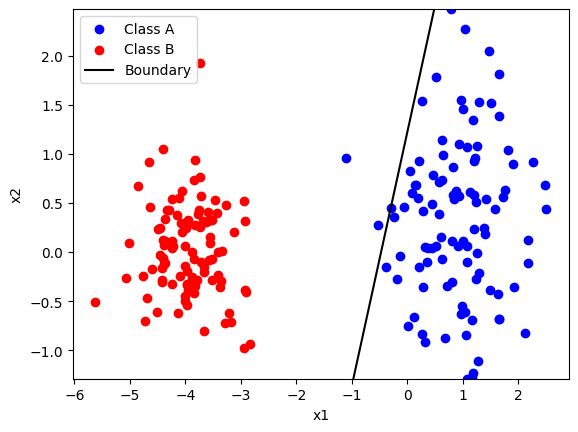

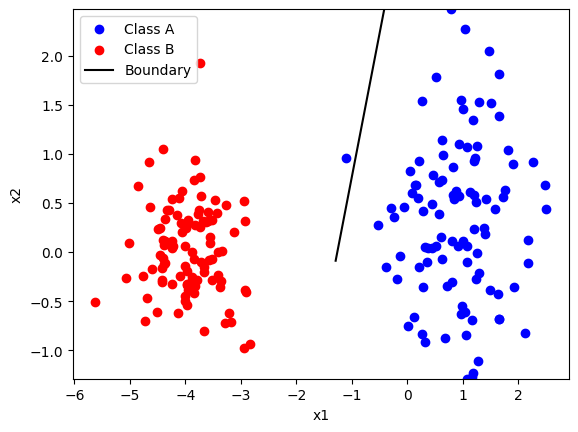

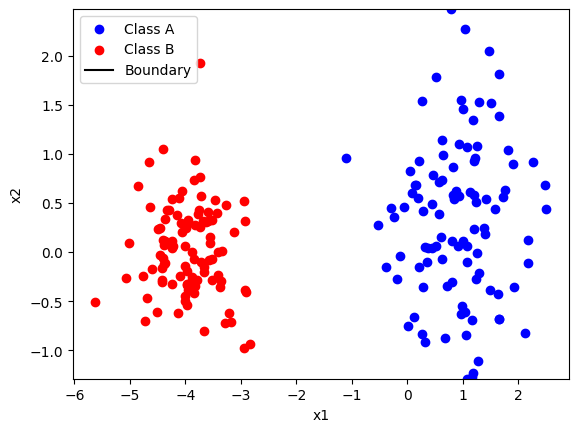

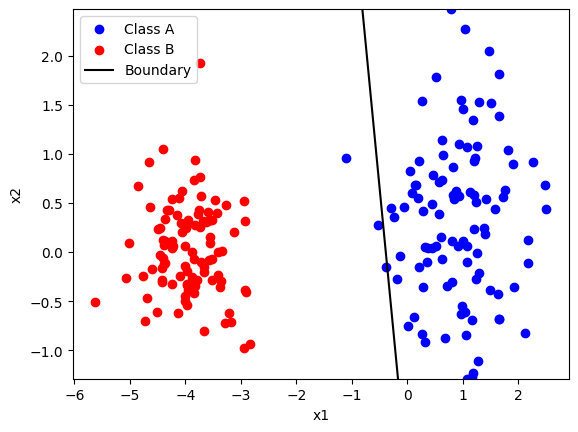

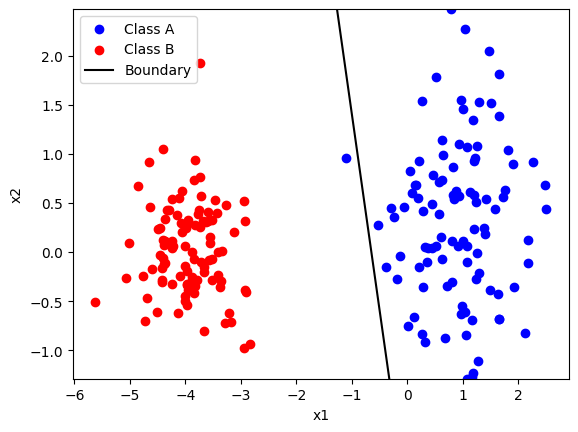

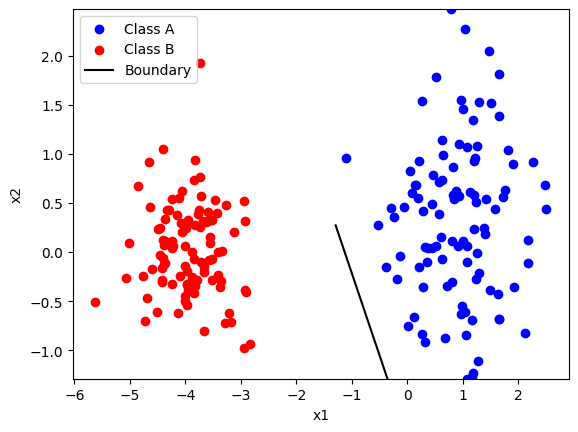

(array([[0.03549444, 0.02120053, 0.04      ]]), 6)


In [62]:
results = perceptron_rule(x=patterns_shuffled, y=targetsPerc_shuffled, create_plot = True)
print(results)

## Delta Rule

In [63]:
def delta_rule_batch(epoch, x, y, eta = 0.001, create_plot: bool = False):

    # Weights should be initialized with small random numbers from normal distribution with zero mean
    if x.shape[0] == 3:
        w = np.random.normal(loc=0.0, scale=1.0, size=(1,3))
    else:
        w = np.random.normal(loc=0.0, scale=1.0, size=(1,2))
    w_history= []
    error_loss_history= []

    error_loss_history.append(mse(x=x,y=y,w=w)) # error at epoch 0

    for e in range(epoch):
        
        w_delta= -eta * (w @ x - y) @ np.transpose(x)

        error_loss_history.append(mse(x=x,y=y,w=w))

        w = w + w_delta
        w_history.append(w.copy())
        
        if create_plot: 
            plot_classifier(ClassA= classA, ClassB=classB, w=w)


    return w, w_history, error_loss_history

In [64]:
def delta_rule_online(epoch, x, y, eta = 0.001, create_plot: bool = False):

    # Weights should be initialized with small random numbers from normal distribution with zero mean
    w = np.random.normal(loc=0.0, scale=1.0, size=(1,3))
    epoch_reached = False
    epoch_count = 0
    w_history = []
    error_loss_history = []

    error_loss_history.append(mse(x=x,y=y,w=w)) #error at epoch 0

    while not epoch_reached: 

        for i in range(len(x[0])):

            w_delta = -eta*x[:,i] * (w @ x[:,i] - y[i])
            w = w + w_delta
            w_history.append(w.copy())

            if create_plot: 
                plot_classifier(ClassA=classA, ClassB=classB, w=w)

        error_loss_history.append(mse(x=x,y=y,w=w))
        epoch_count +=1

        if epoch_count == epoch: 
            epoch_reached = True

    return w, w_history, error_loss_history

In [65]:
w_delta_online, _, loss_delta_online=delta_rule_online(epoch=100,x=patterns_shuffled, y=targetsDelta_shuffled, create_plot= False, eta=0.01)
w_perceptron, _ = perceptron_rule(x=patterns_shuffled, y=targetsPerc_shuffled, create_plot = False)
w_delta_batch, _, loss_delta_batch= delta_rule_batch(epoch=100,x=patterns_shuffled, y=targetsDelta_shuffled, create_plot = False)

In [66]:

def calculate_boundary(w):
   
   slope = -w[0, 0]/w[0, 1]  #The slope of the boundary
   constant_term = -w[0, 2]/w[0, 1] #The constant term of the linear equation 

   boundary_x = np.linspace(patterns_shuffled.min(), patterns_shuffled.max(), num=100, endpoint=True, retstep=False, dtype=None, axis=0)
   boundary_y = slope * boundary_x + constant_term

   return boundary_x, boundary_y


In [67]:
delta_bound_online = calculate_boundary(w_delta_online)
perceptron_bound= calculate_boundary(w_perceptron)
delta_bound_batch=calculate_boundary(w_delta_batch)

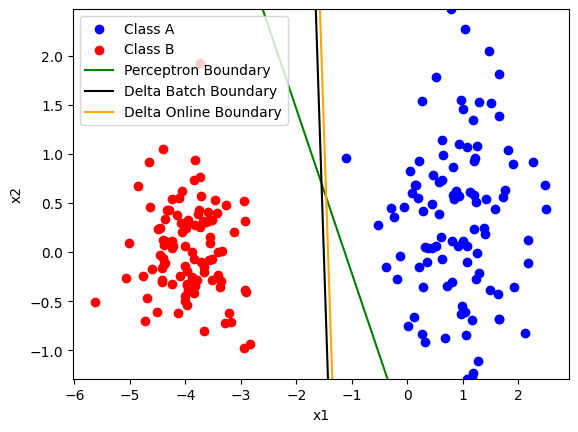

In [68]:
plt.scatter(classA[0, :], classA[1, :], color="blue", label="Class A")
plt.scatter(classB[0, :], classB[1, :], color="red", label="Class B")
plt.plot(perceptron_bound[0],perceptron_bound[1], color="green", label="Perceptron Boundary")
plt.plot(delta_bound_batch[0],delta_bound_batch[1], color="black", label="Delta Batch Boundary")
plt.plot(delta_bound_online[0],delta_bound_online[1], color="orange", label="Delta Online Boundary")
plt.ylim(classA[1, :].min(), classA[1, :].max())
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

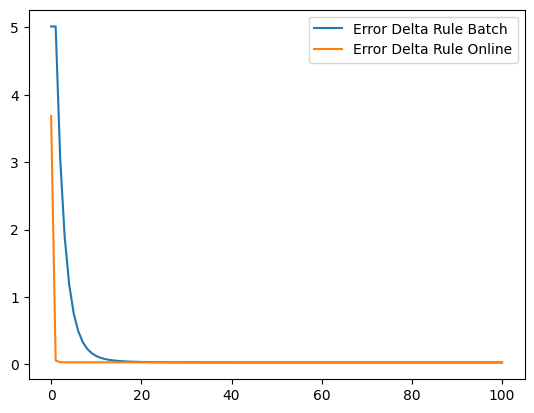

In [69]:
plt.plot(loss_delta_batch, label = "Error Delta Rule Batch")
plt.plot(loss_delta_online, label="Error Delta Rule Online")
plt.legend()
plt.show()

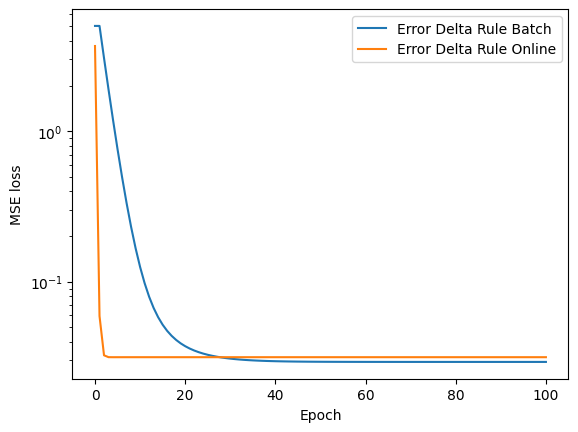

In [70]:
plt.plot(loss_delta_batch, label = "Error Delta Rule Batch")
plt.plot(loss_delta_online, label="Error Delta Rule Online")
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.legend()
plt.show()

## Comparison of different learning rates for Delta learning (Online)

In [71]:
w_delta_online, _, loss_delta_online_1=delta_rule_online(epoch=100,x=patterns_shuffled, y=targetsDelta_shuffled, create_plot= False, eta=0.02)
w_delta_online, _, loss_delta_online_2=delta_rule_online(epoch=100,x=patterns_shuffled, y=targetsDelta_shuffled, create_plot= False, eta=0.01)
w_delta_online, _, loss_delta_online_3=delta_rule_online(epoch=100,x=patterns_shuffled, y=targetsDelta_shuffled, create_plot= False, eta=0.005)
w_delta_online, _, loss_delta_online_4=delta_rule_online(epoch=100,x=patterns_shuffled, y=targetsDelta_shuffled, create_plot= False, eta=0.001)
w_delta_online, _, loss_delta_online_5=delta_rule_online(epoch=100,x=patterns_shuffled, y=targetsDelta_shuffled, create_plot= False, eta=0.0001)

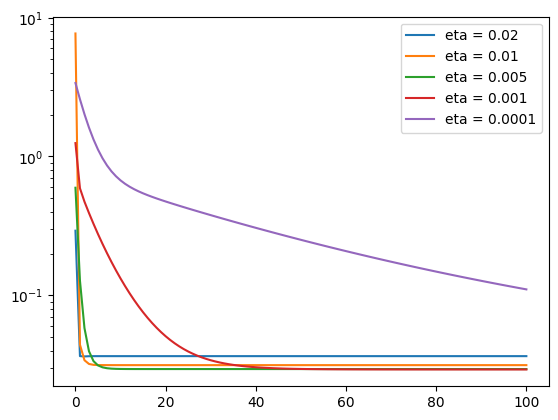

In [72]:


plt.plot(loss_delta_online_1, label = "eta = 0.02")
plt.plot(loss_delta_online_2, label = "eta = 0.01")
plt.plot(loss_delta_online_3, label = "eta = 0.005")
plt.plot(loss_delta_online_4, label = "eta = 0.001")
plt.plot(loss_delta_online_5, label = "eta = 0.0001")
plt.legend()
plt.yscale("log")
plt.show()

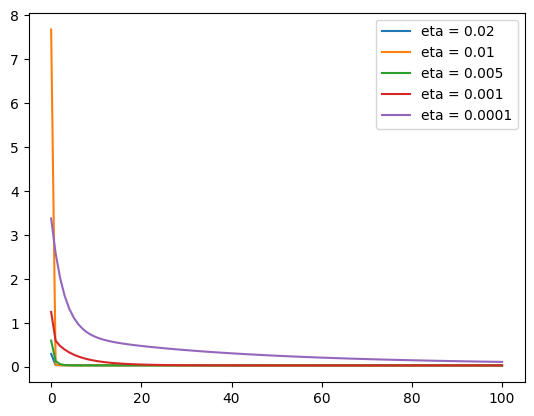

In [73]:

plt.plot(loss_delta_online_1, label = "eta = 0.02")
plt.plot(loss_delta_online_2, label = "eta = 0.01")
plt.plot(loss_delta_online_3, label = "eta = 0.005")
plt.plot(loss_delta_online_4, label = "eta = 0.001")
plt.plot(loss_delta_online_5, label = "eta = 0.0001")
plt.legend()
plt.show()

## Comparison of different learning rates for Delta learning (Batch)

In [74]:
w_delta_batch, _, loss_delta_batch_1=delta_rule_batch(epoch=100,x=patterns_shuffled, y=targetsDelta_shuffled, create_plot= False, eta=0.0002)
w_delta_batch, _, loss_delta_batch_2=delta_rule_batch(epoch=100,x=patterns_shuffled, y=targetsDelta_shuffled, create_plot= False, eta=0.0001)
w_delta_batch, _, loss_delta_batch_3=delta_rule_batch(epoch=100,x=patterns_shuffled, y=targetsDelta_shuffled, create_plot= False, eta=0.0005)
w_delta_batch, _, loss_delta_batch_4=delta_rule_batch(epoch=100,x=patterns_shuffled, y=targetsDelta_shuffled, create_plot= False, eta=0.00001)
w_delta_batch, _, loss_delta_batch_5=delta_rule_batch(epoch=100,x=patterns_shuffled, y=targetsDelta_shuffled, create_plot= False, eta=0.000001)

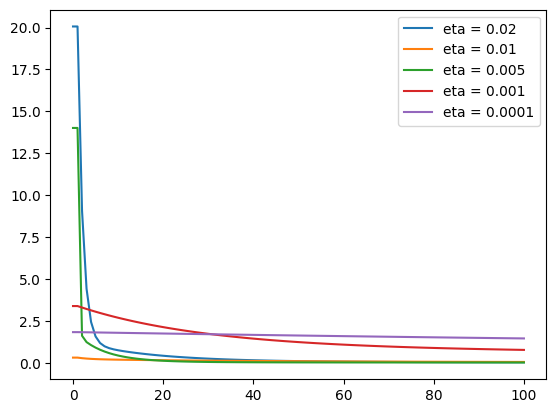

In [75]:

plt.plot(loss_delta_batch_1, label = "eta = 0.02")
plt.plot(loss_delta_batch_2, label = "eta = 0.01")
plt.plot(loss_delta_batch_3, label = "eta = 0.005")
plt.plot(loss_delta_batch_4, label = "eta = 0.001")
plt.plot(loss_delta_batch_5, label = "eta = 0.0001")
plt.legend()
#plt.yscale("log")
plt.show()

## Remove bias

In [76]:
import numpy as np
from helper_functions import mse    

n = 100
mA = [1.0, 0.3]
mB = [-4.0, 0.0]
sigmaA = 0.8
sigmaB = 0.5

np.random.seed(4)
classA = np.random.randn(n, 2) * sigmaA + mA
classB = np.random.randn(n, 2) * sigmaB + mB

classA = classA.transpose()
classB = classB.transpose()

In [77]:
# Create input data, with bias term (one extra dimension)
classABias = np.concatenate((classA, np.ones((1, n))), axis=0)
classBBias = np.concatenate((classB, np.ones((1, n))), axis=0)

# This is our input data (2 classes, with 2 dimensions for visualizatio in 2D plane + 1 deminsion for the bias term)
patterns = np.concatenate((classABias, classBBias), axis=1)

# Create shuffled indices. Will be used to shuffle the samples
shuffled_indices = np.random.permutation(patterns.shape[1])

# Shuffle Input data
patterns_shuffled = patterns[:, shuffled_indices]

# Target data (delta rule)
targetsDelta = np.concatenate((np.ones(classA.shape[1]), -np.ones(classB.shape[1])))
targetsDelta_shuffled = targetsDelta[shuffled_indices] # Shuffle targets

# Target data (perceptron rule)
targetsPerc = np.concatenate((np.ones(classA.shape[1]), np.zeros(classB.shape[1])))
targetsPerc_shuffled = targetsPerc[shuffled_indices] # Shuffle targets

In [78]:
patterns_shuffled_wo_bias = patterns_shuffled[0:2, :]
print(patterns_shuffled_wo_bias.shape)

(2, 200)


### Perceptron rule without bias
Without bias, the boundary line will always go through origo. Therefore the hypothesis is that the perceptron will converge when all the data samples are on opposite sides of any line that passes through origo. So the class A and class B samples can not lying in the same direction away from origo, when we have bno bias

In [79]:
# Without the bias (cancelled early). Ran with mA = [1.0, 0.3] mB = [-4.0, 0.0]
#w, counter = perceptron_rule(x=patterns_shuffled_wo_bias, y=targetsPerc_shuffled, create_plot=True)

In [80]:
# Without the bias (cancelled early). Ran with mA = [1.0, 1.0] mB = [-4.0, 1.0]
#w, counter = perceptron_rule(x=patterns_shuffled_wo_bias, y=targetsPerc_shuffled, create_plot=True)

### Delta rule batch mode without bias
For delta rule with batch mode, the computation will stop whenever it reaches the final epoch or when it has minimized the loss. But the result will be that if the data samples are not on the opposite sides of any line going through origo, there will never be a boundary line that separates the 2 classes. The delta rula algorithm will end at what it considers has the lowest possible loss

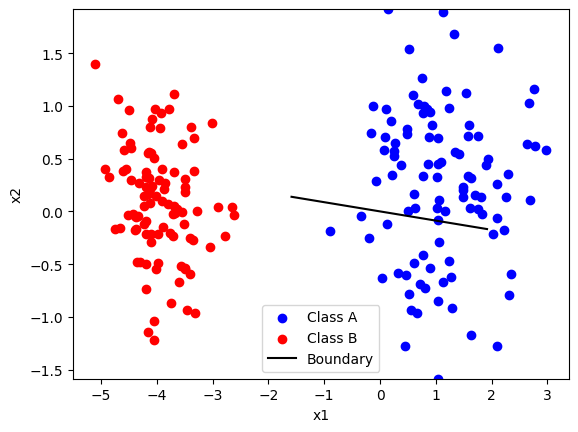

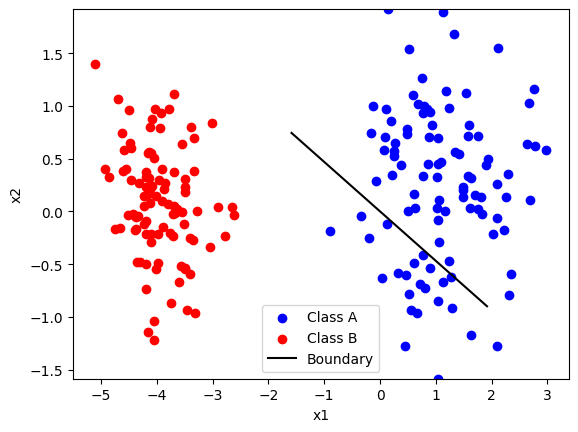

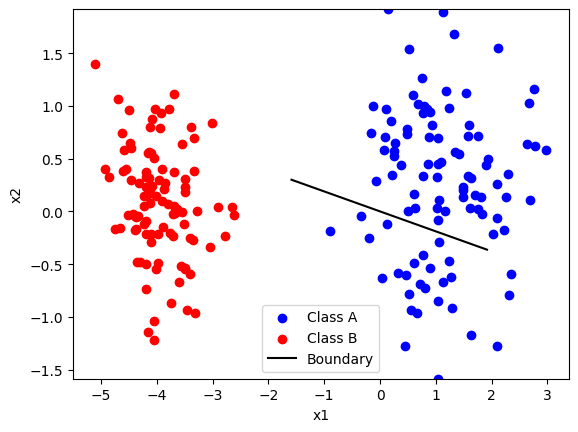

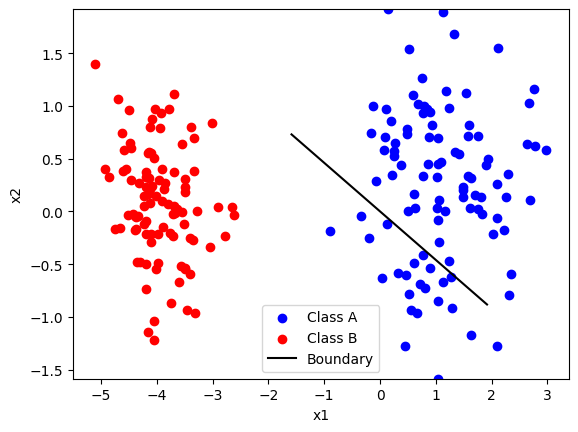

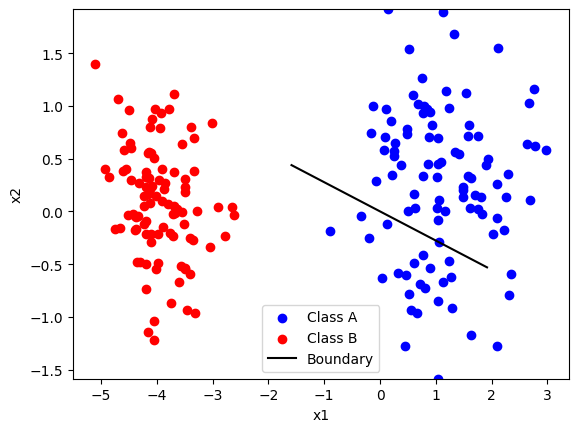

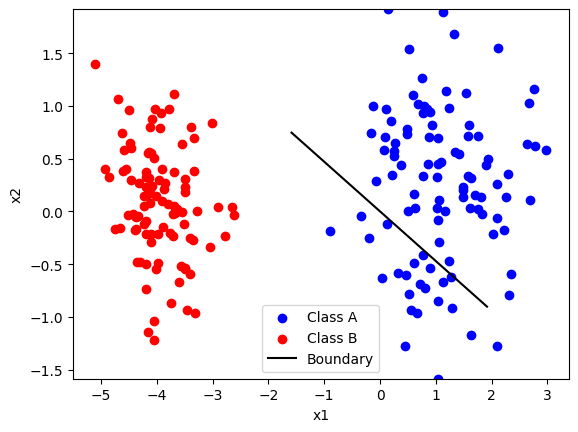

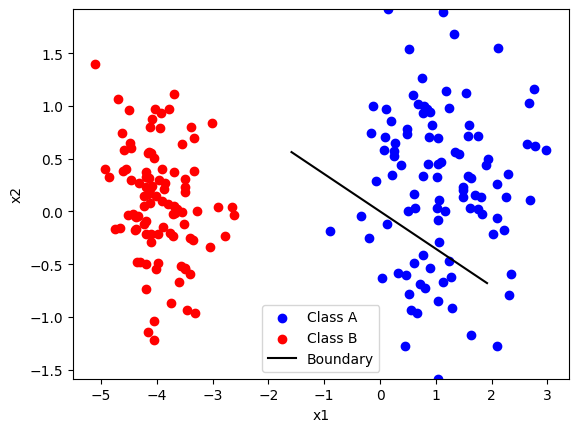

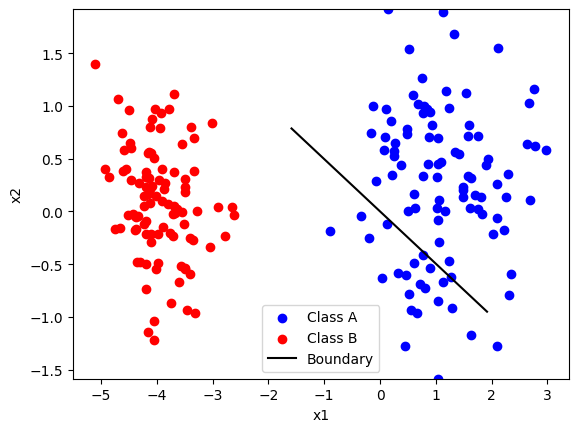

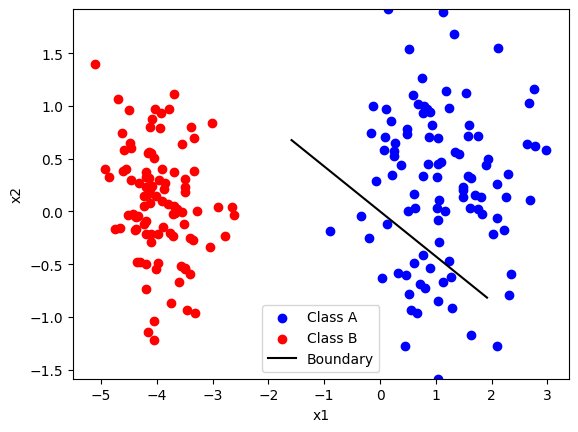

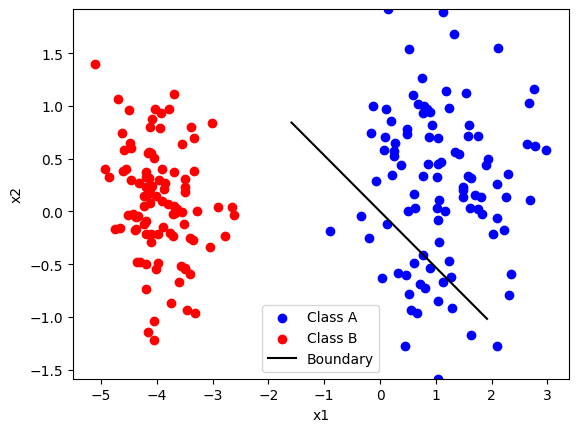

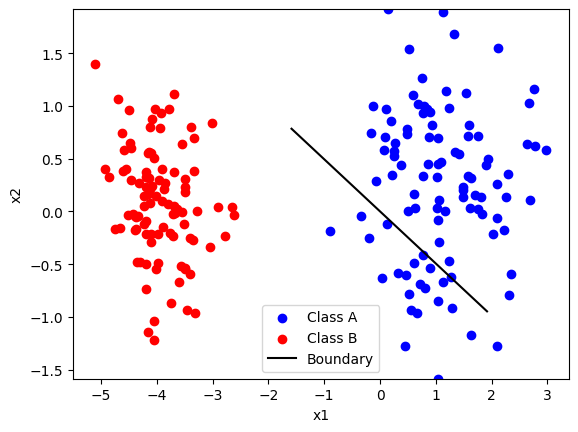

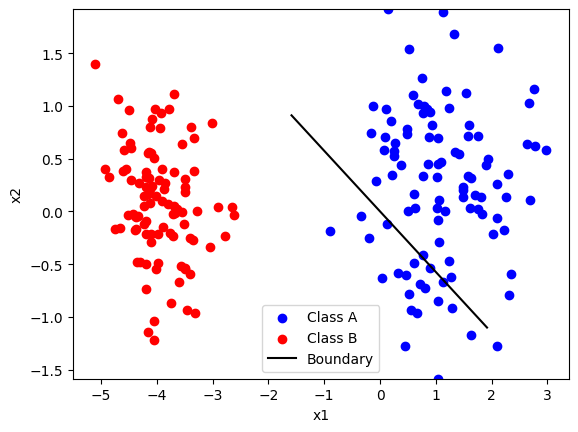

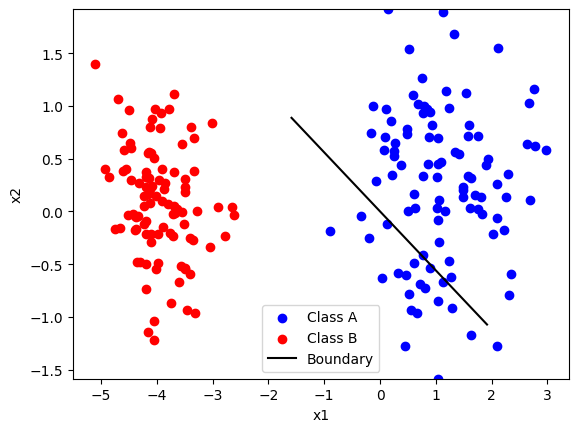

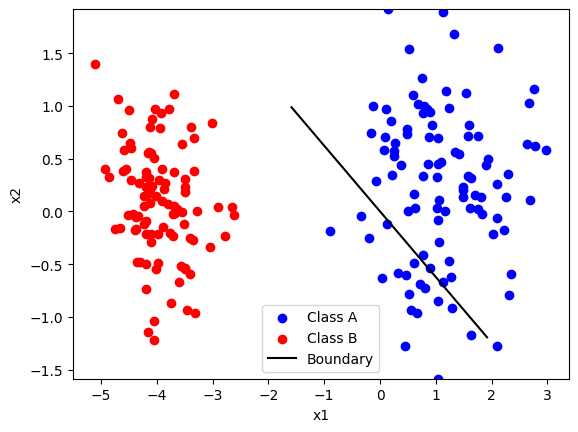

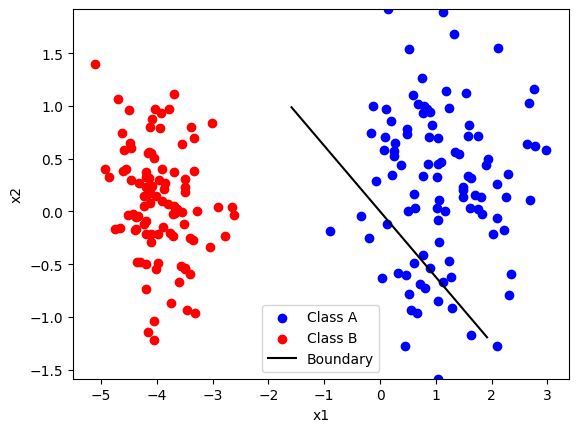

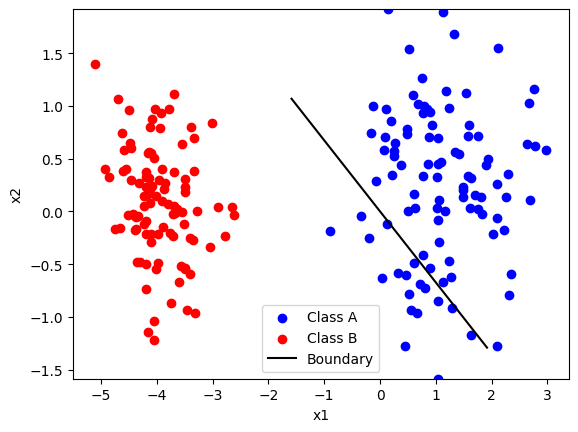

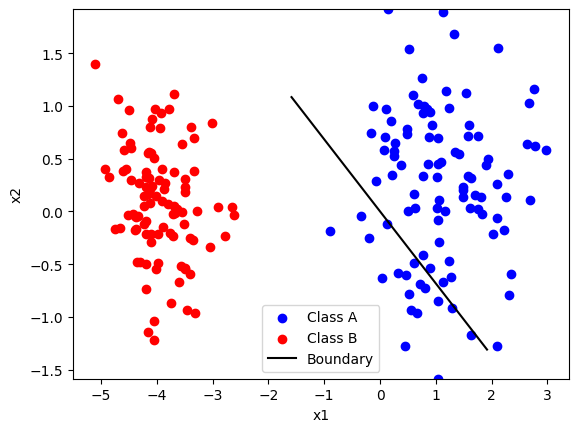

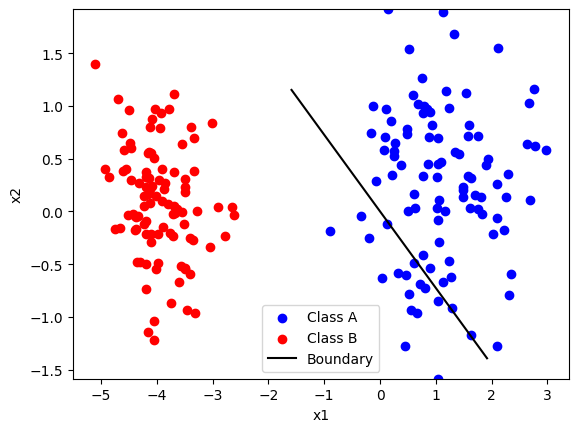

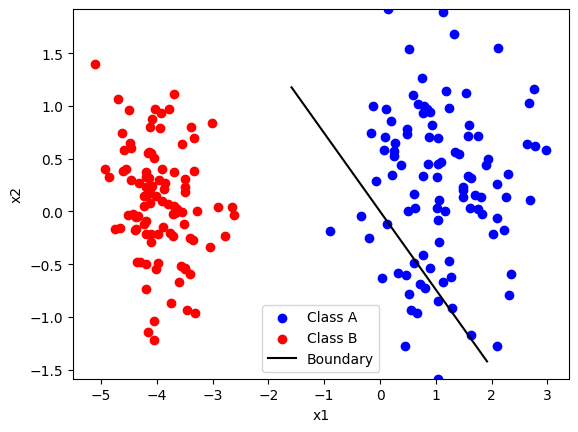

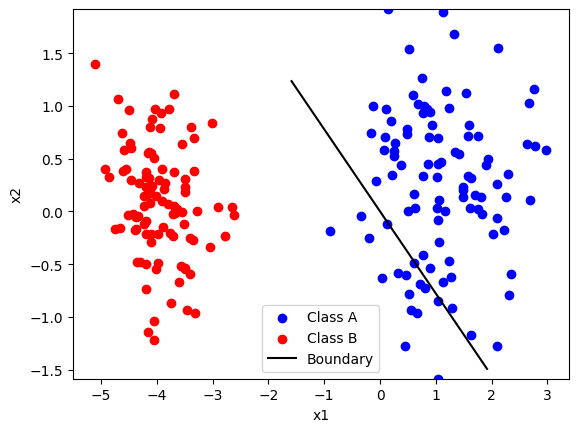

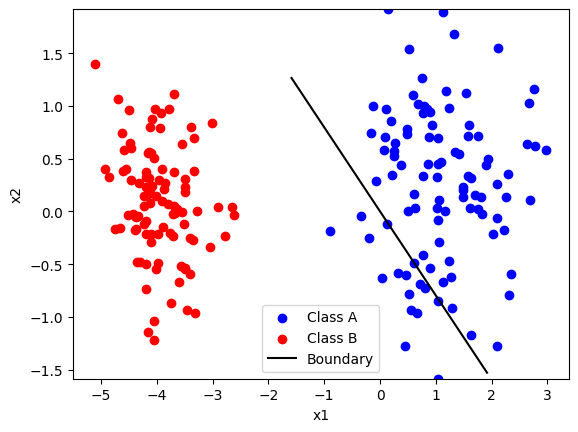

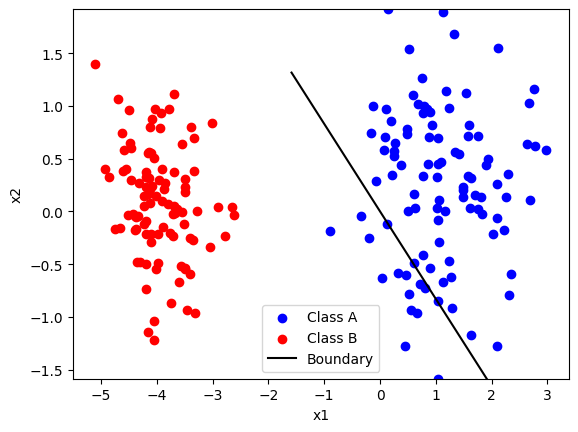

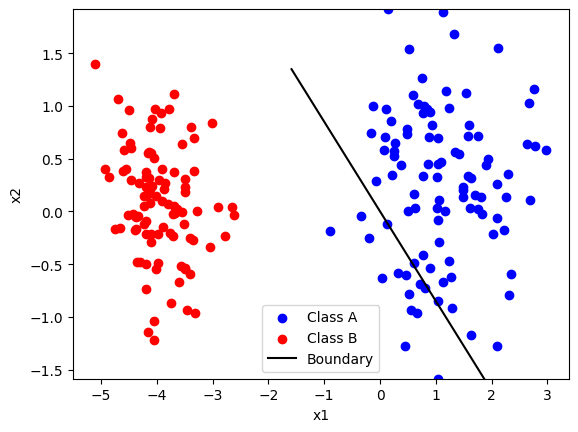

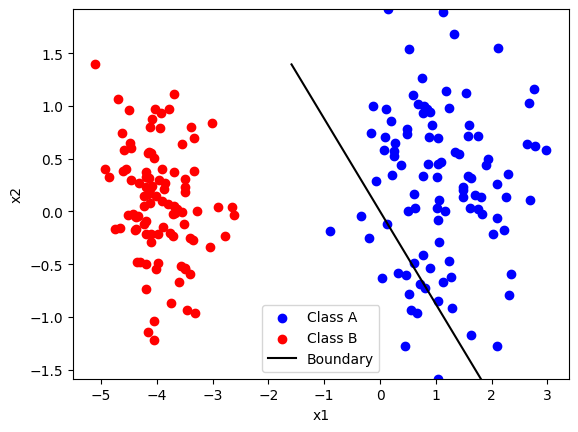

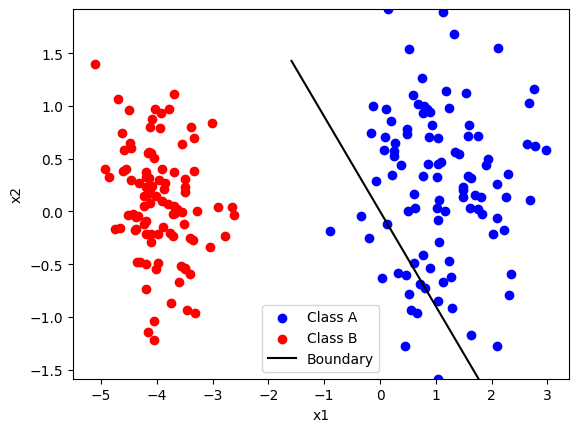

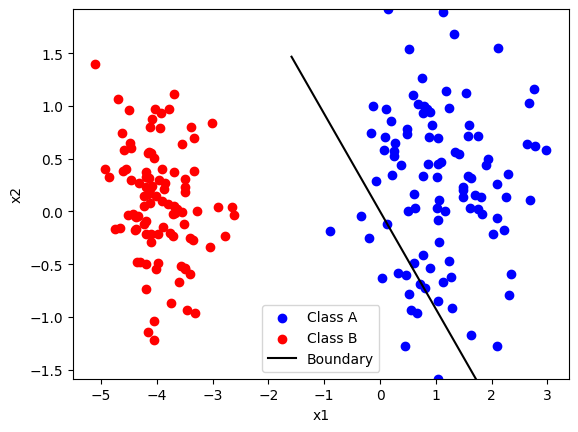

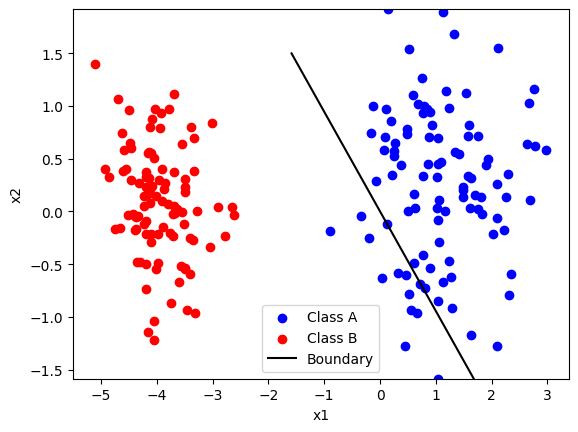

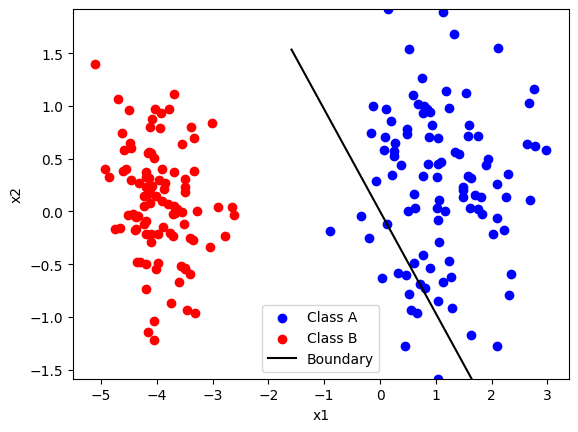

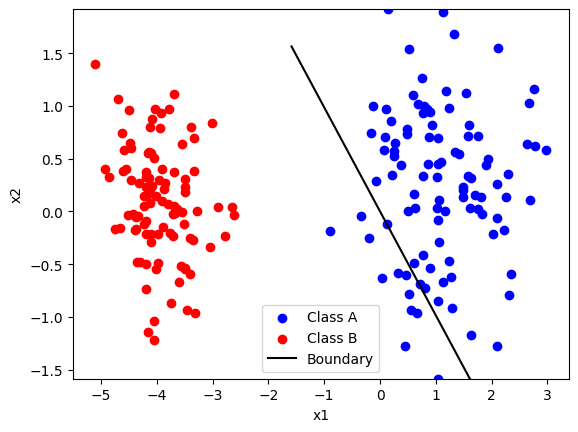

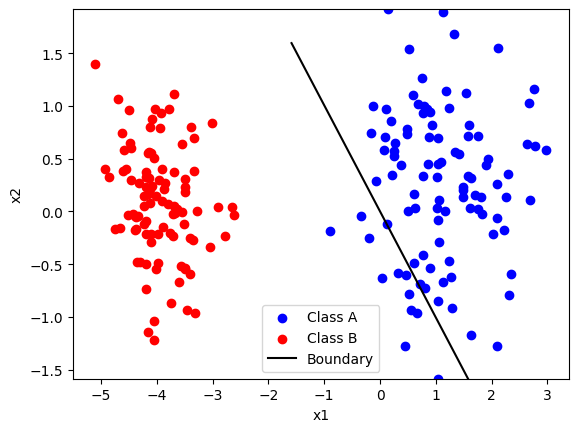

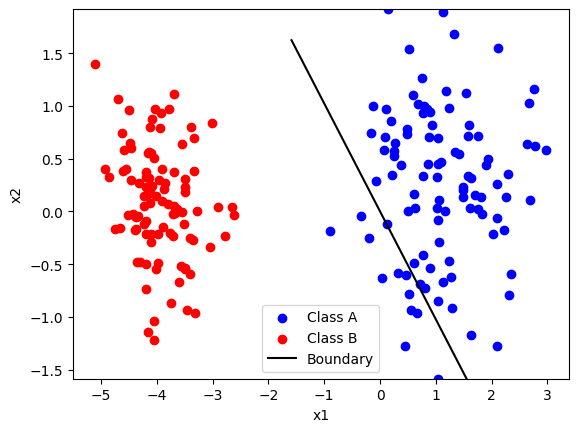

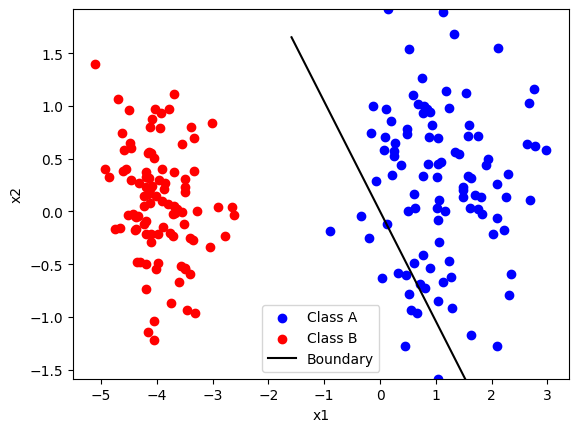

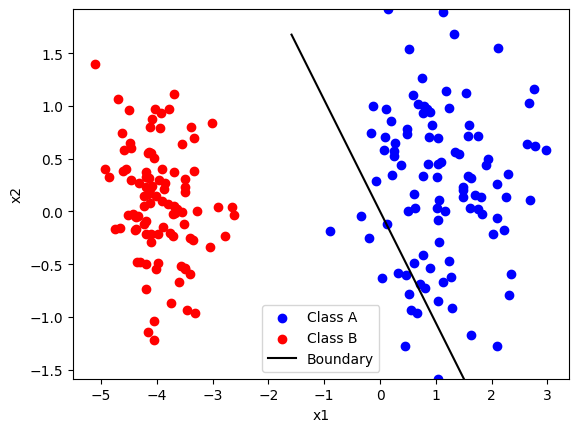

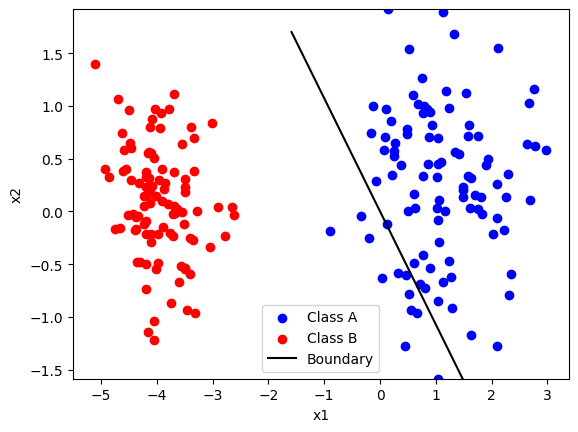

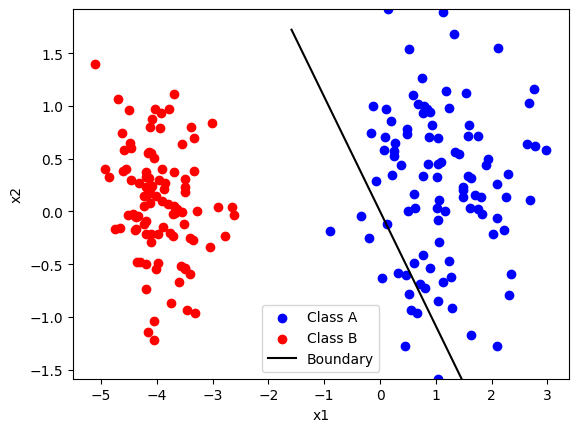

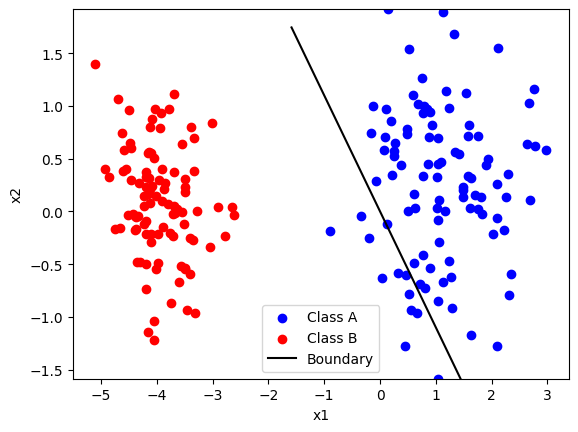

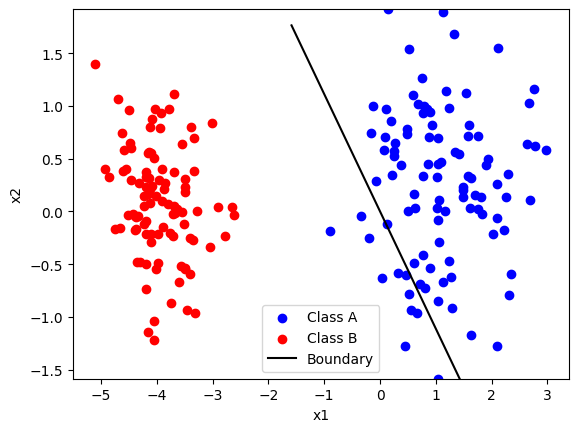

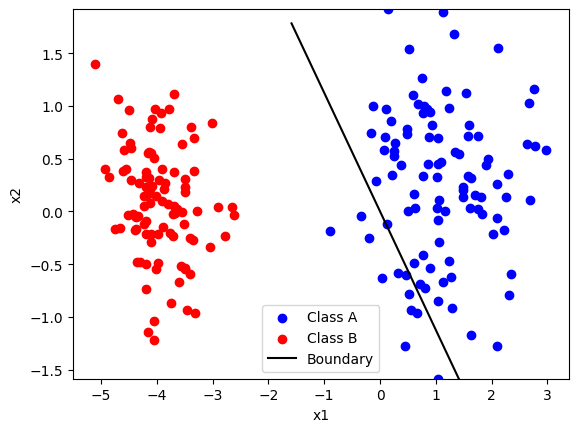

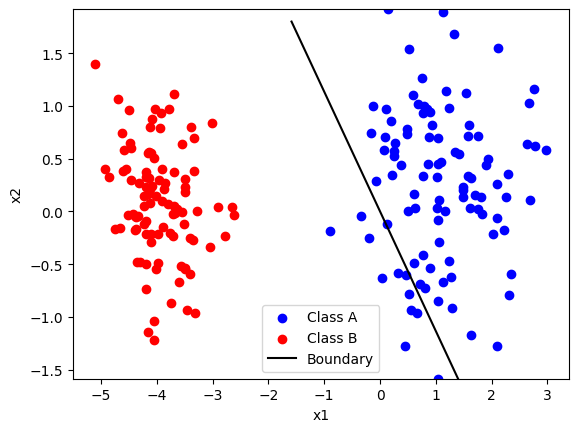

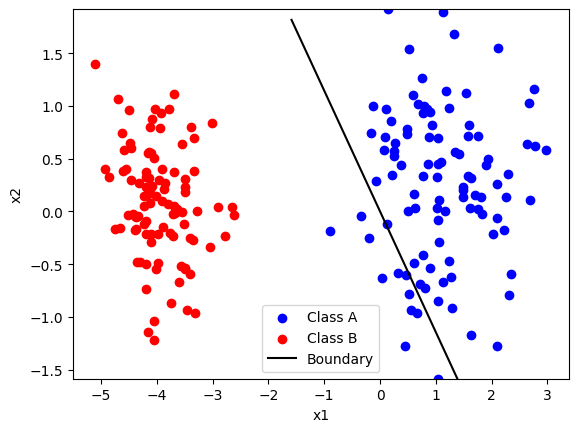

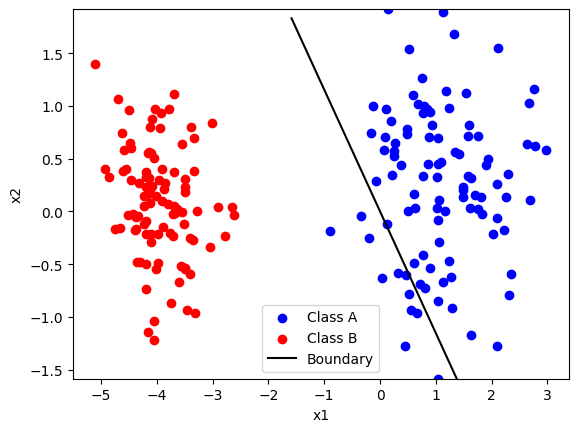

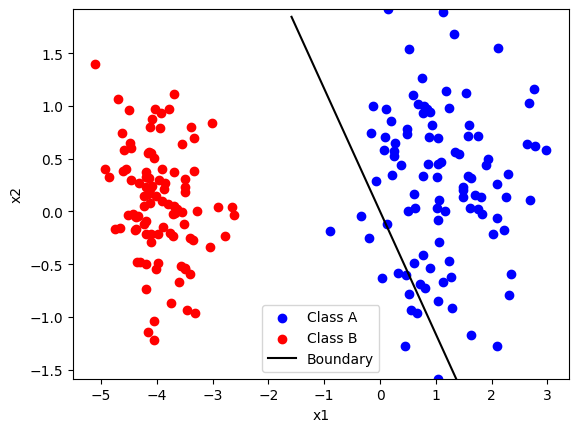

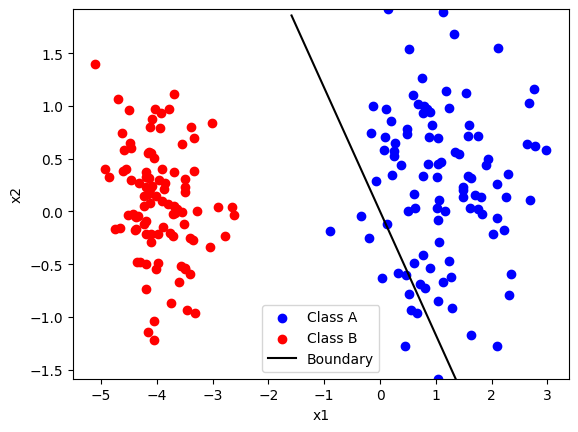

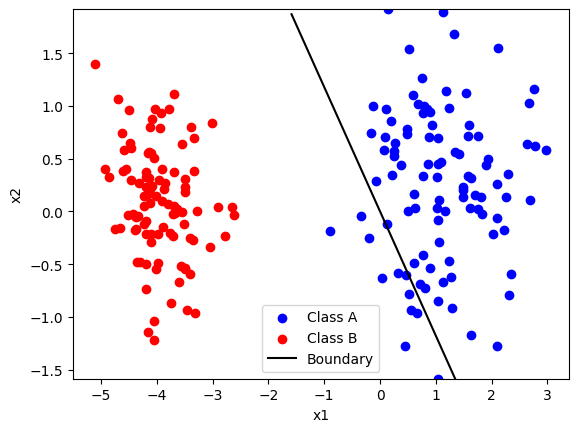

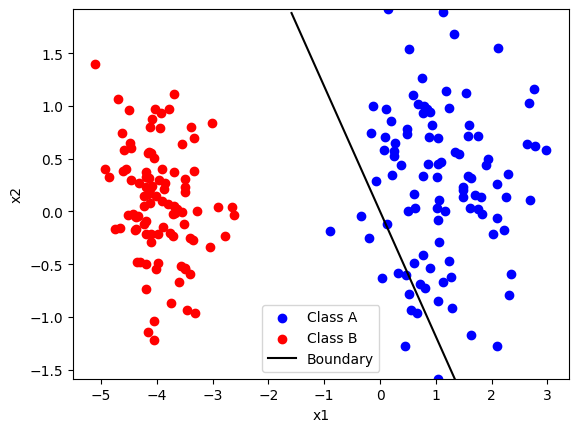

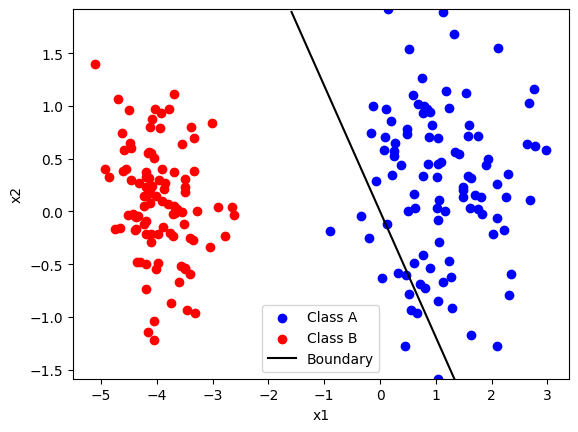

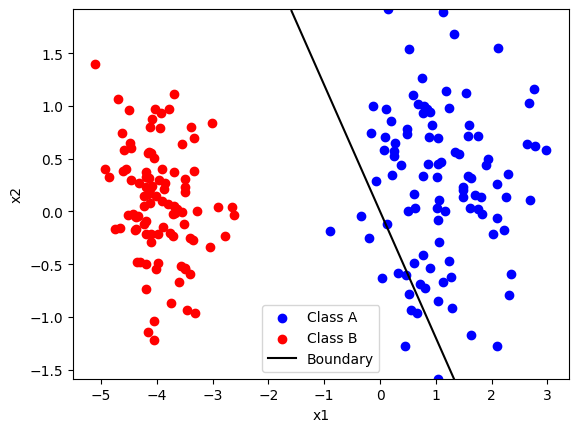

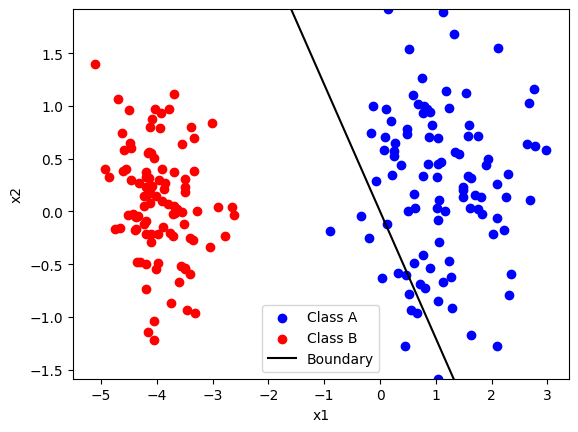

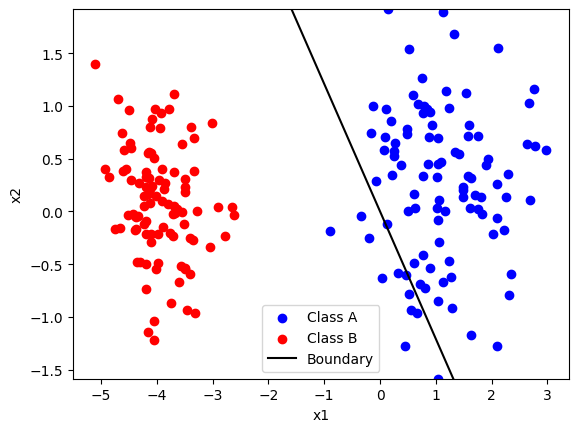

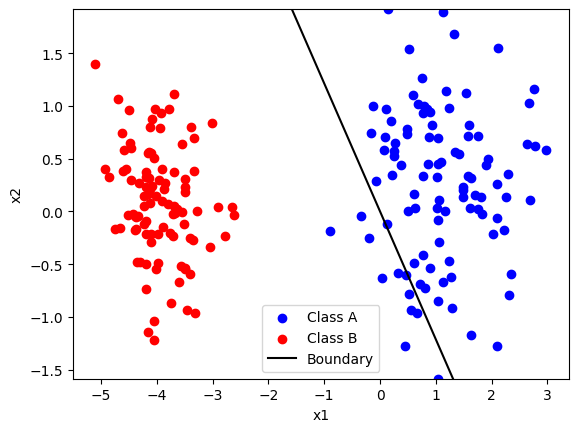

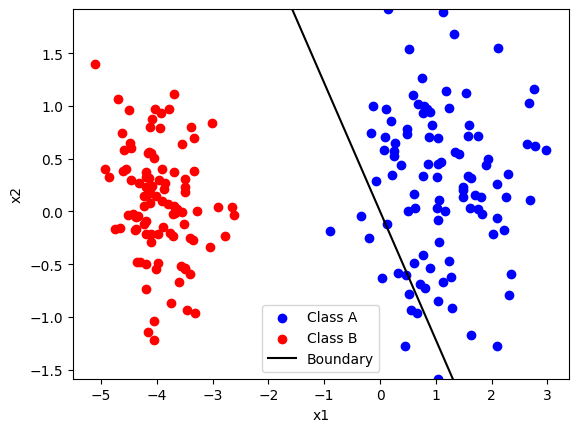

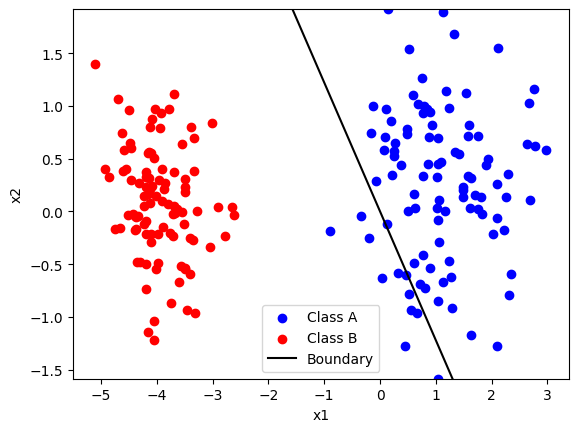

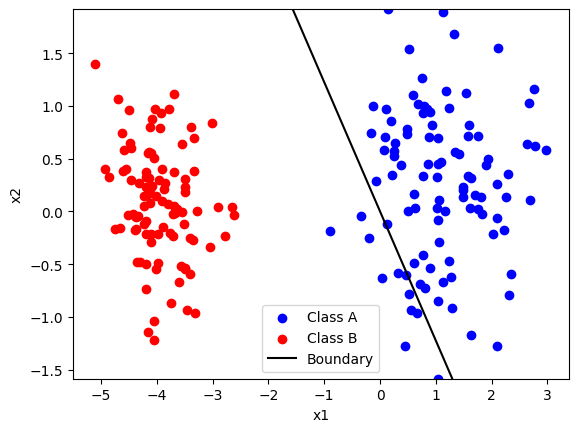

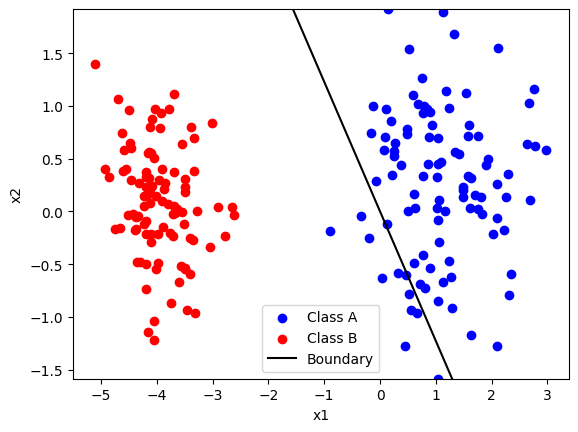

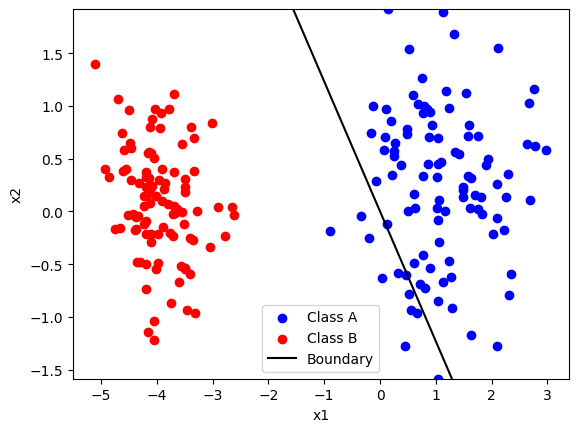

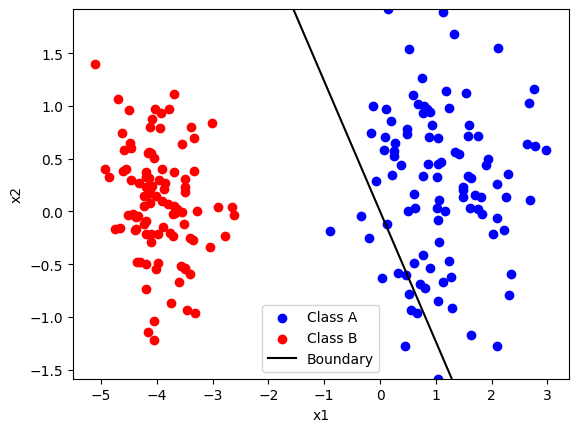

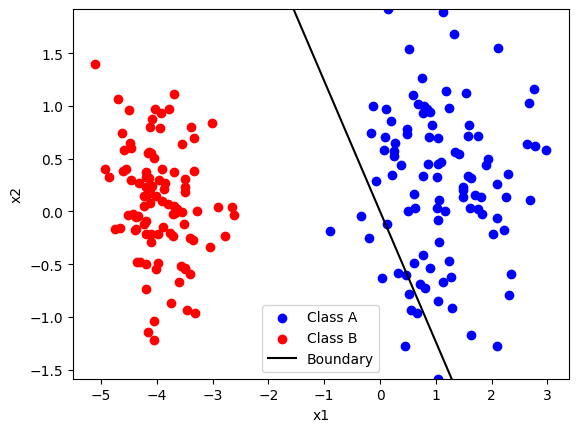

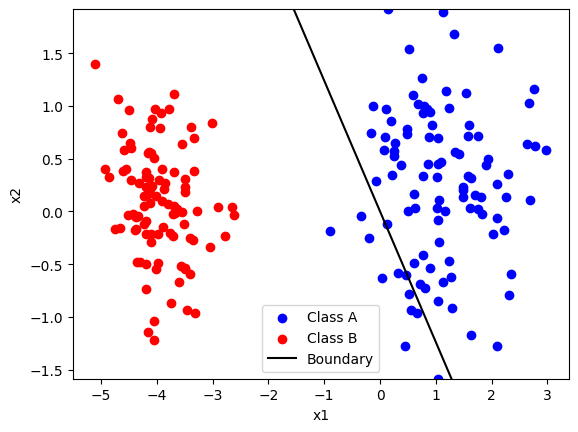

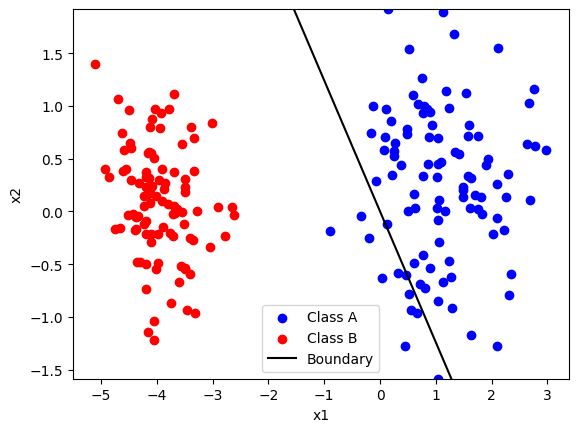

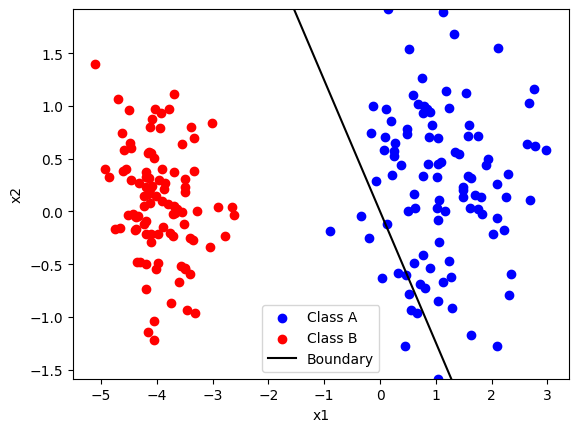

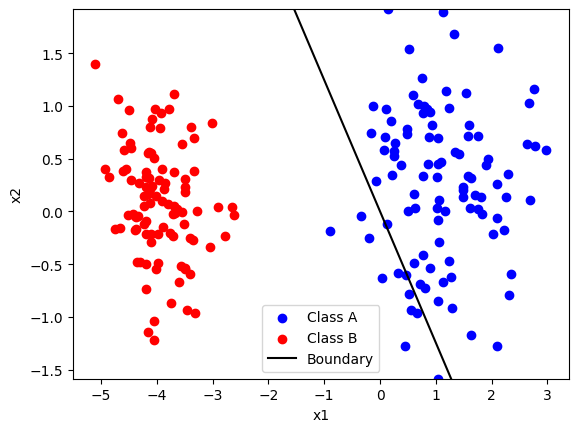

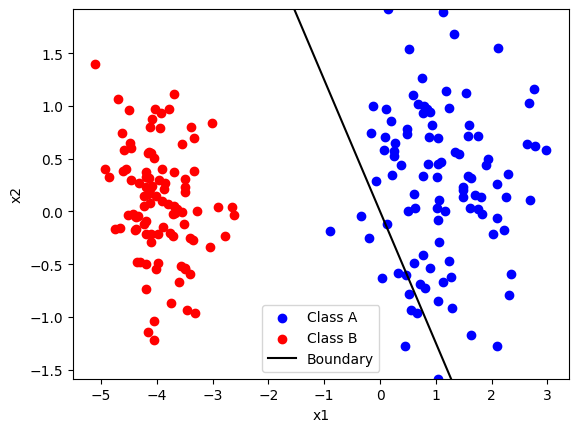

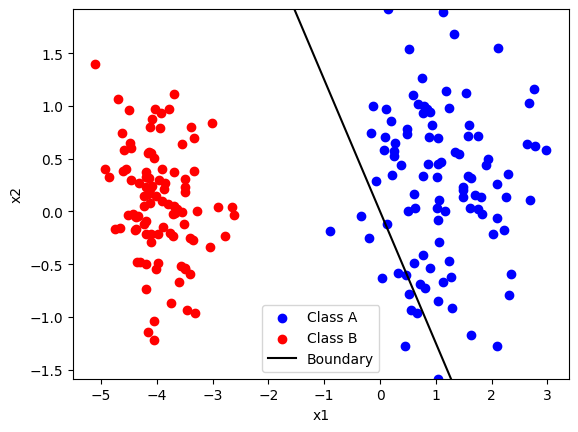

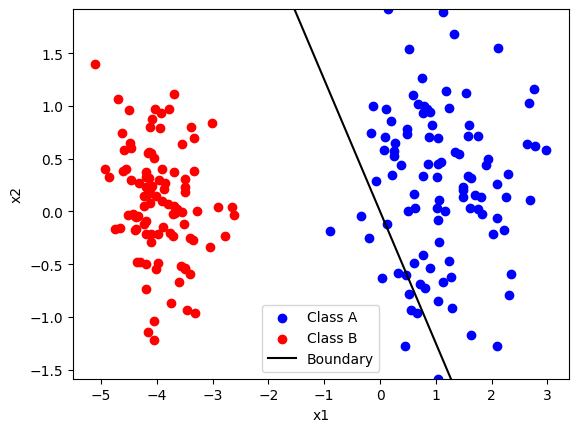

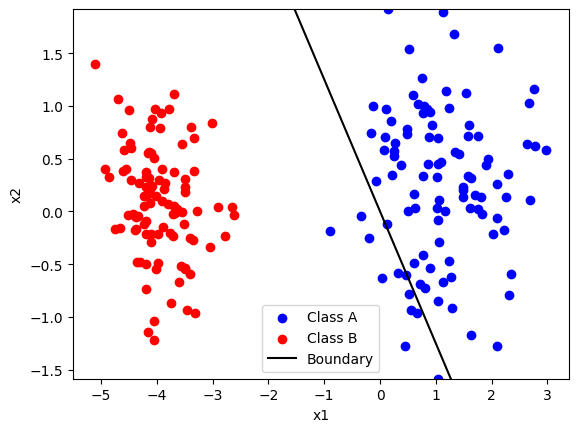

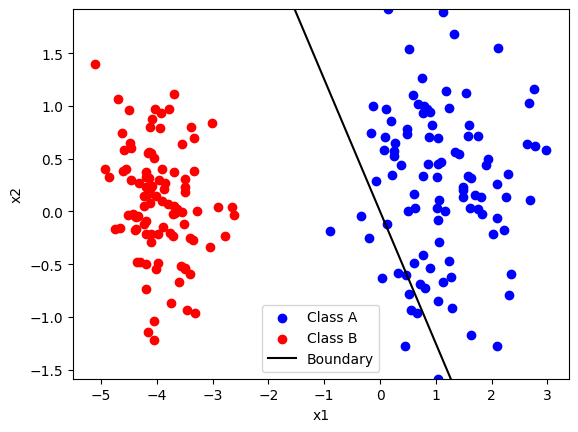

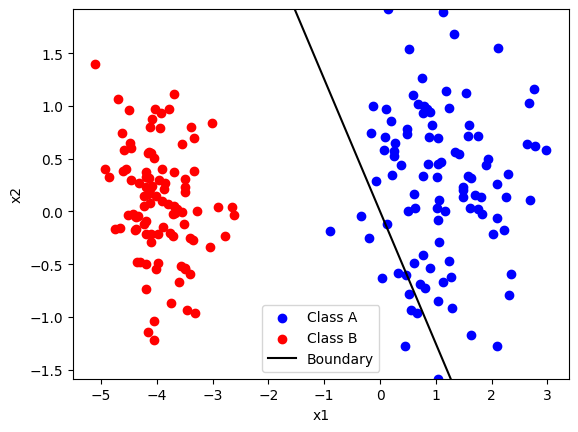

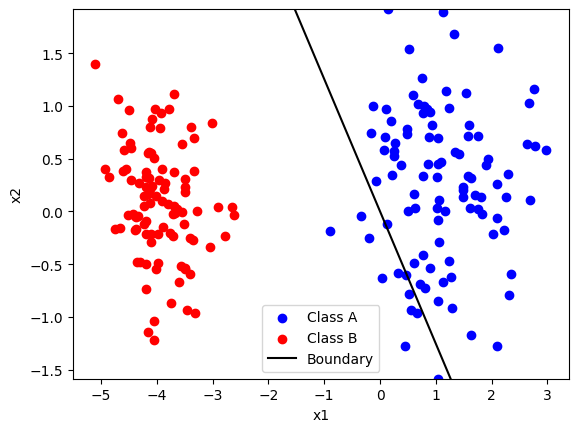

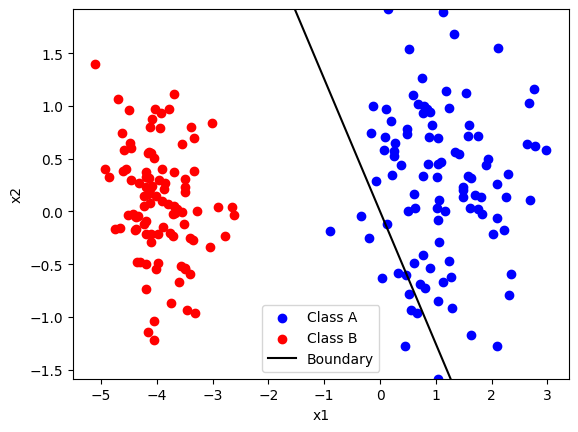

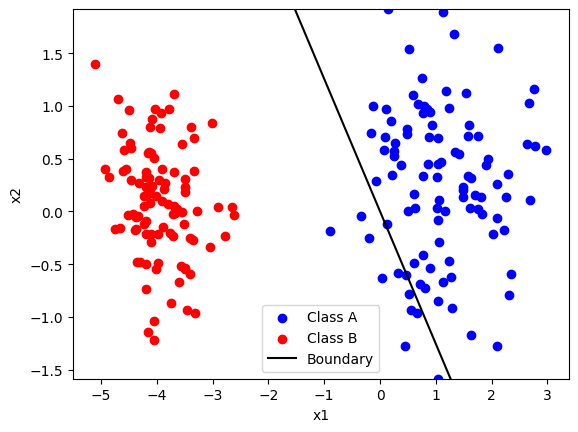

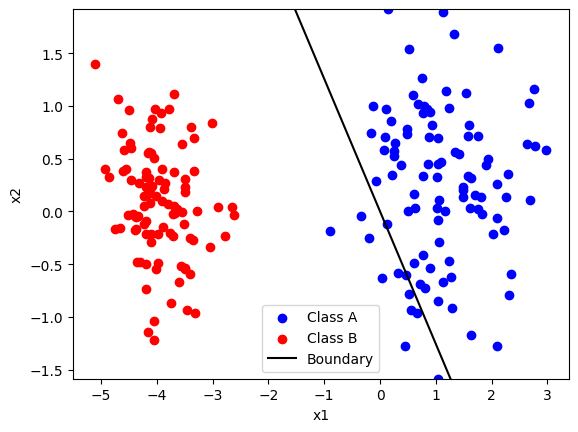

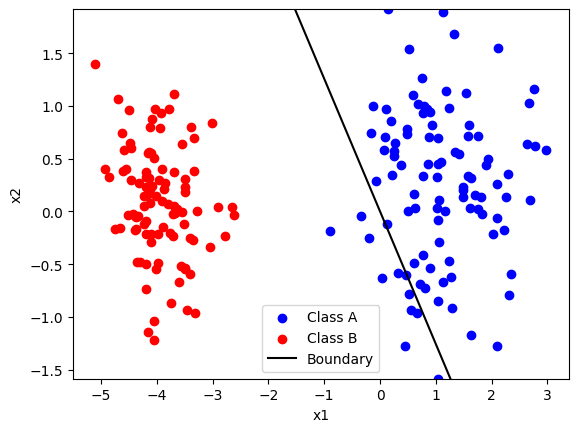

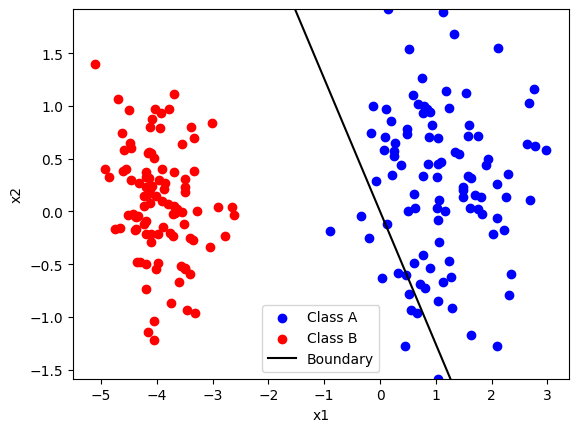

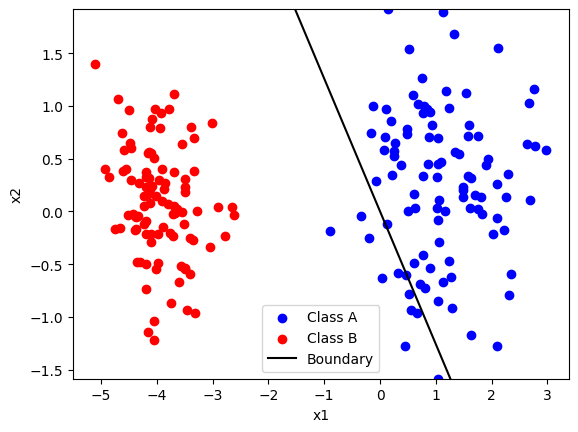

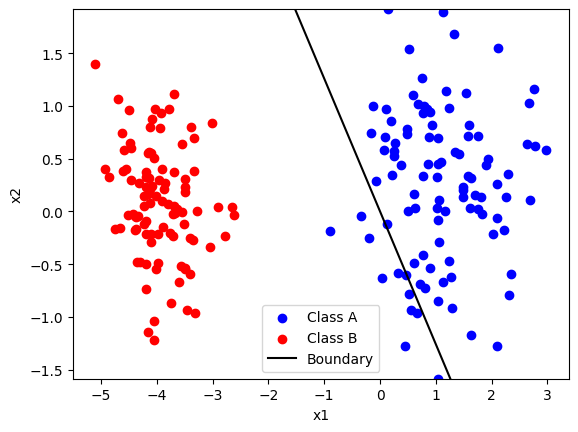

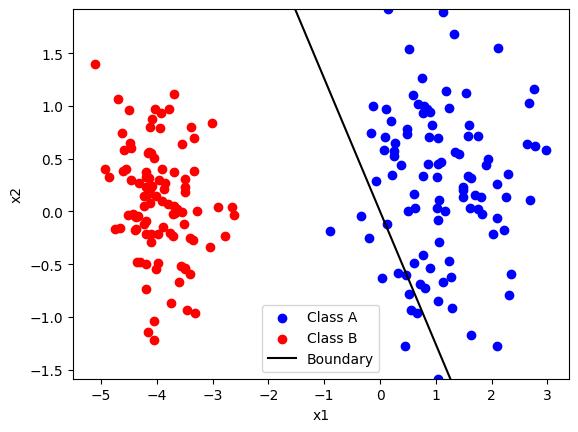

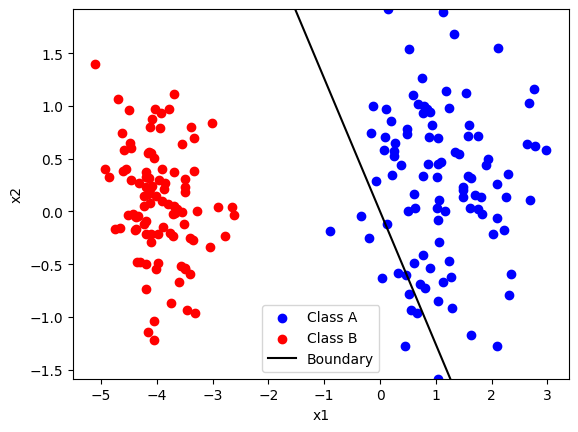

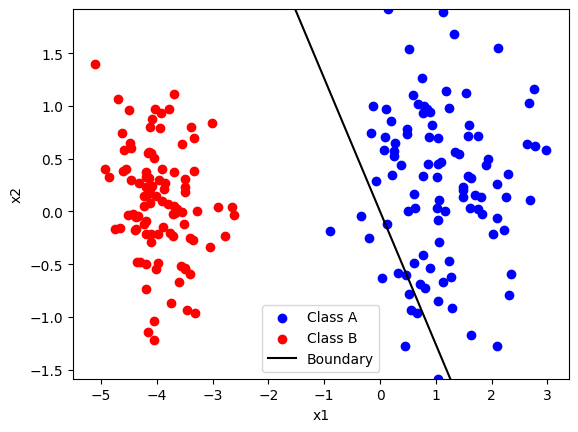

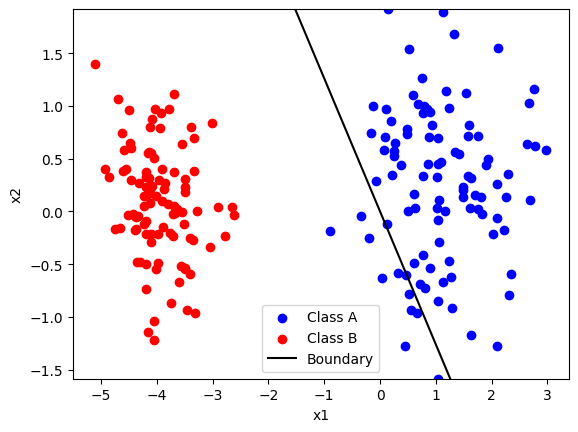

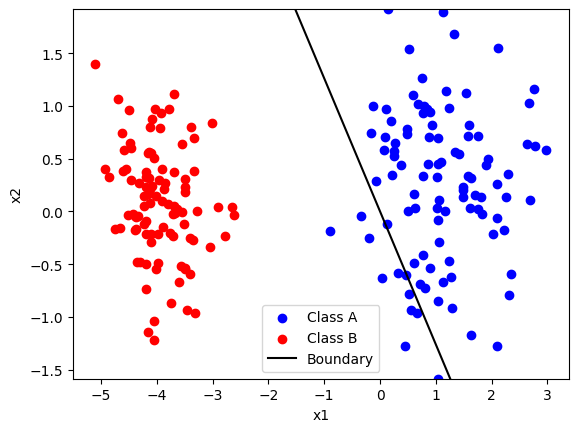

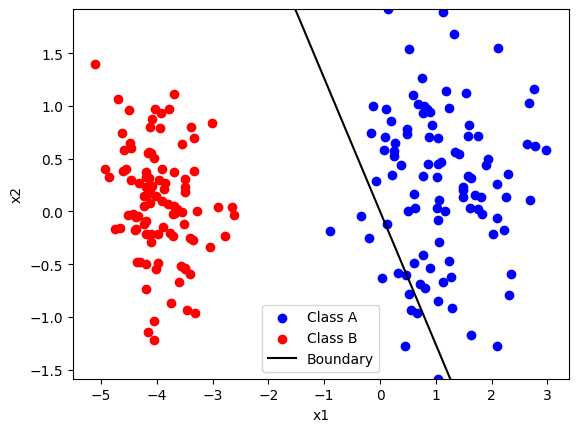

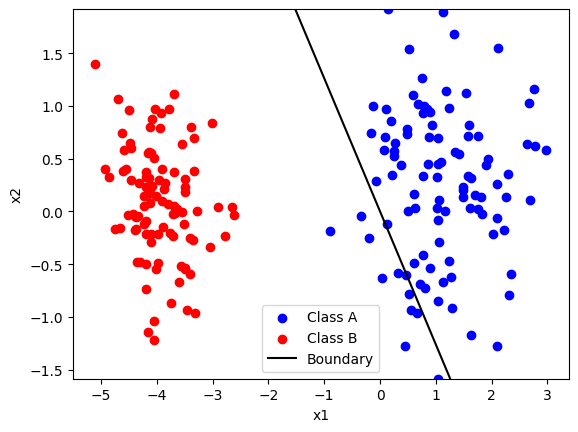

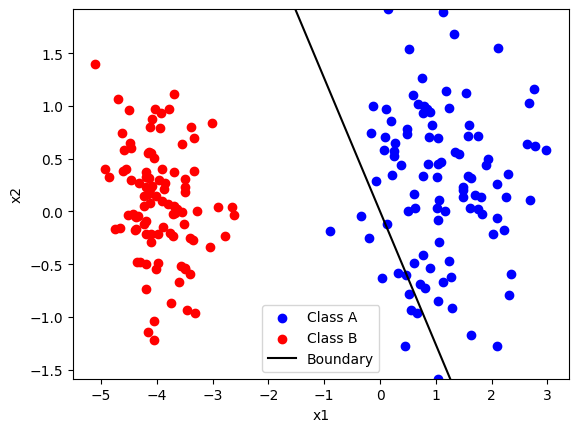

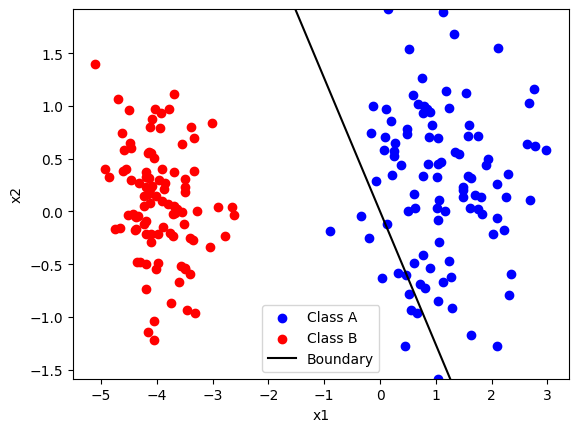

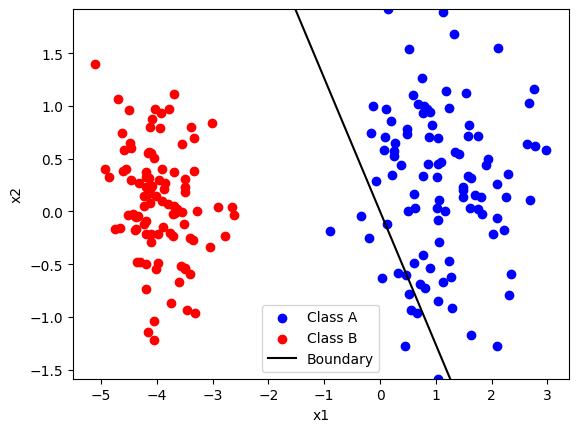

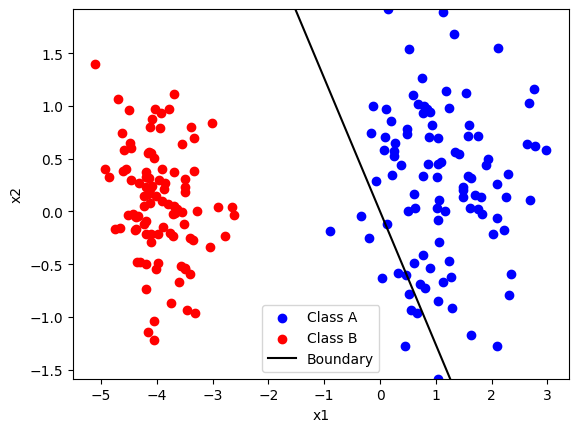

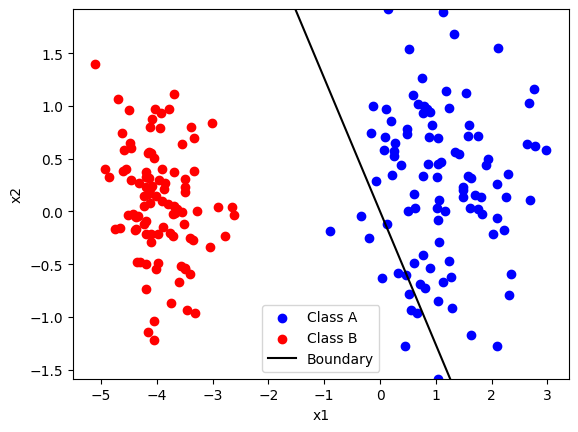

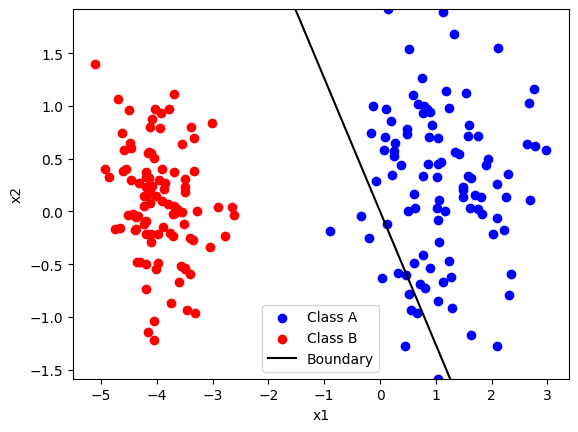

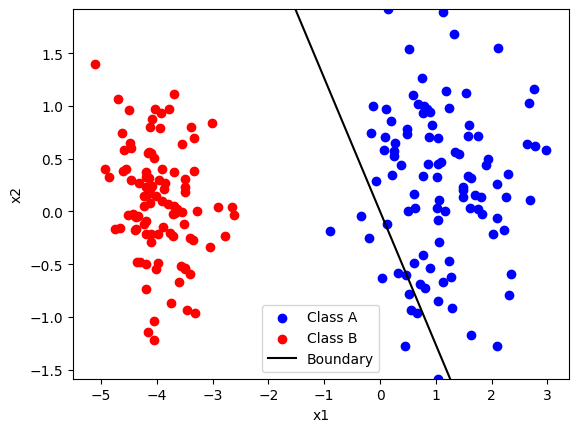

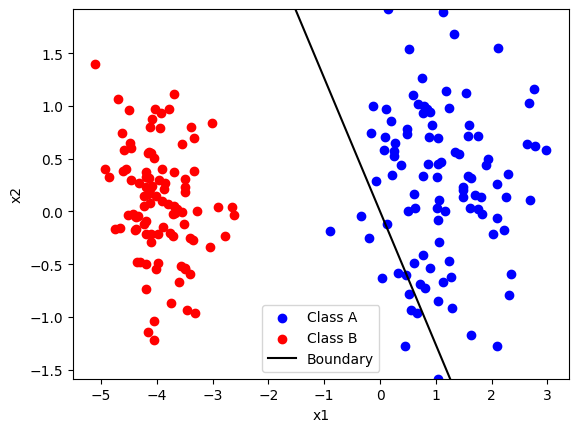

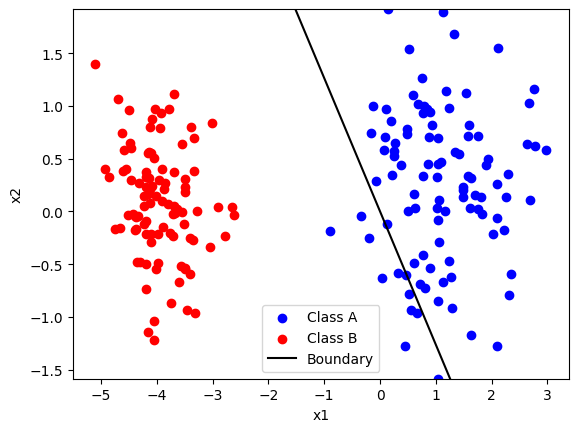

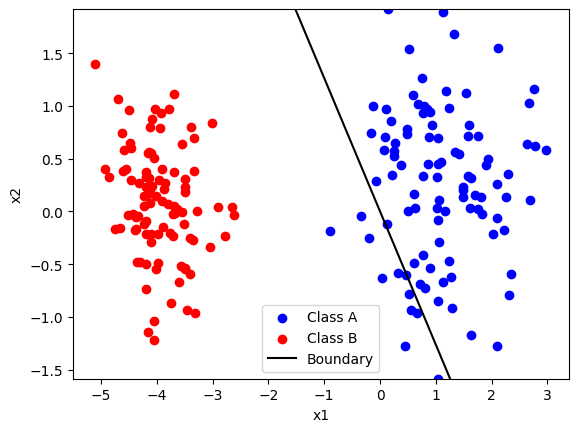

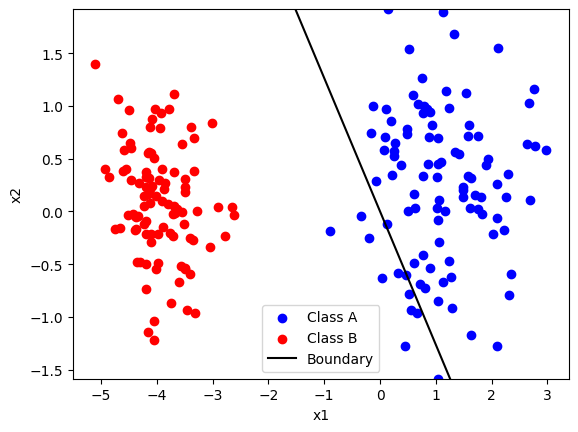

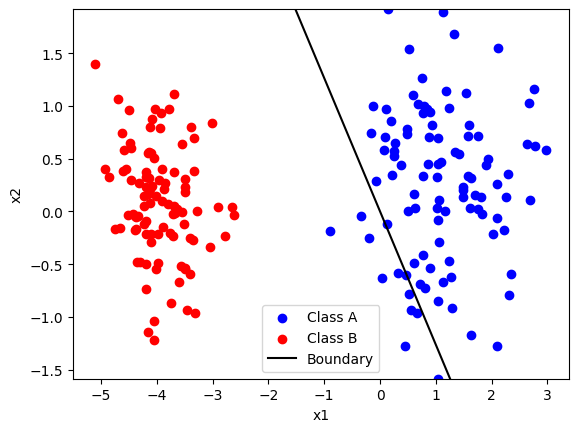

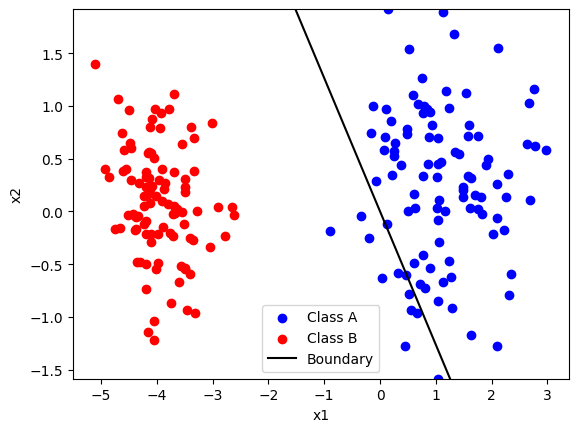

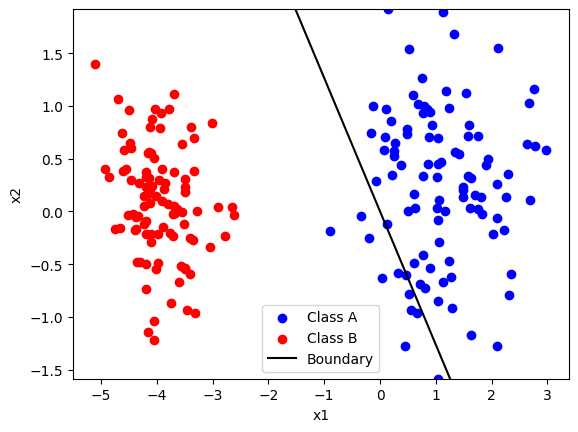

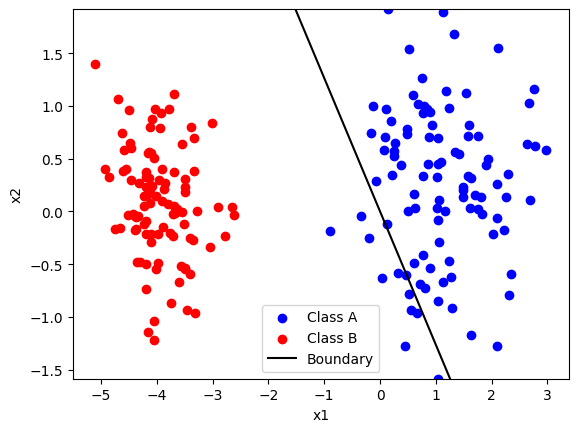

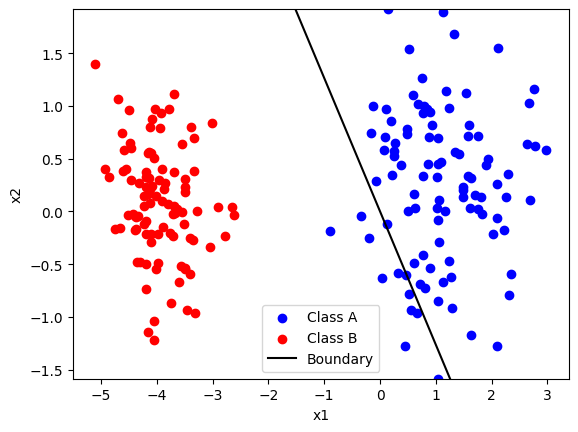

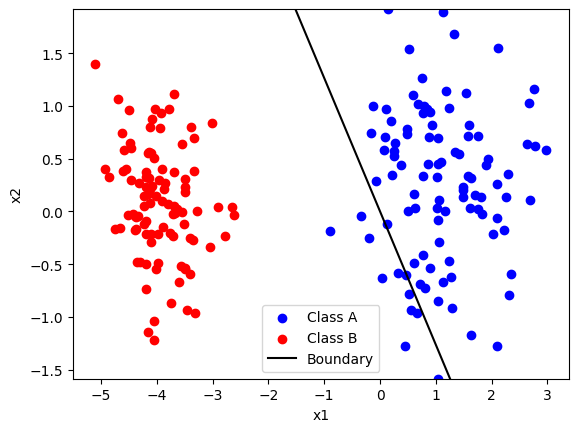

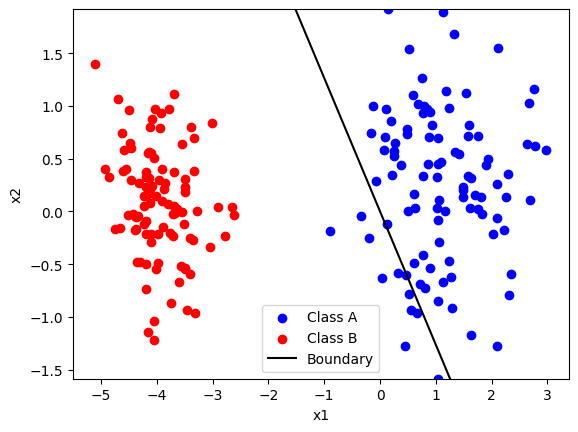

In [81]:
# Without the bias. Ran with mA = [1.0, 0.3] mB = [-4.0, 0.0]
w_delta_batch, _, loss_delta_batch= delta_rule_batch(epoch=100,x=patterns_shuffled_wo_bias, y=targetsDelta_shuffled, create_plot = True)

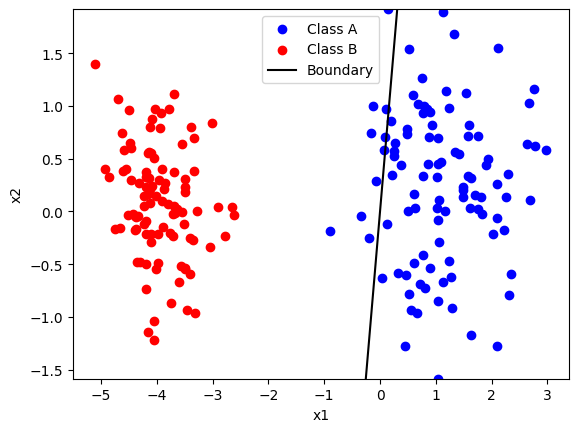

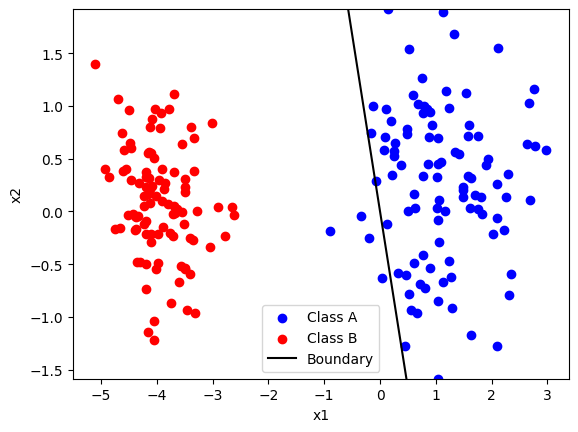

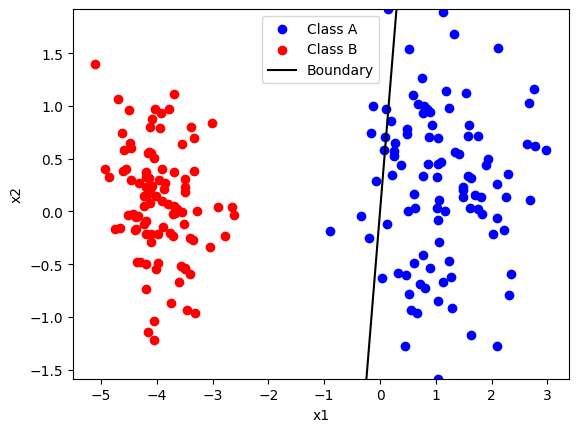

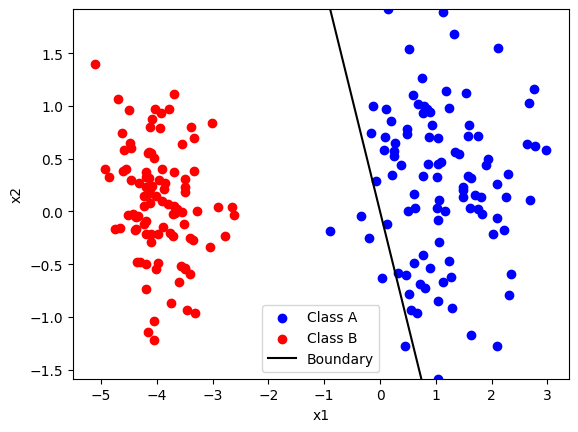

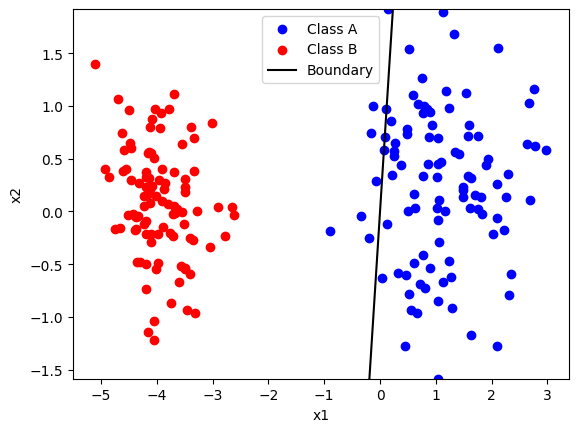

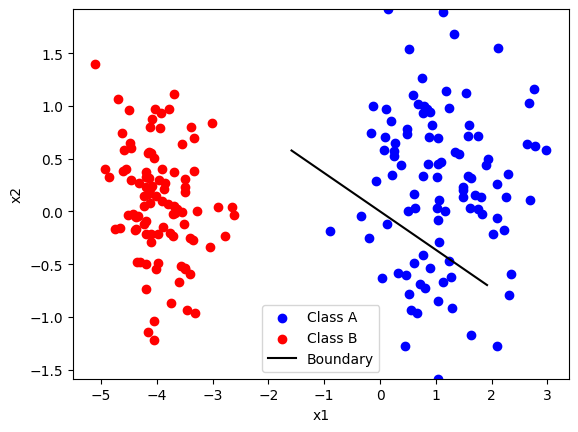

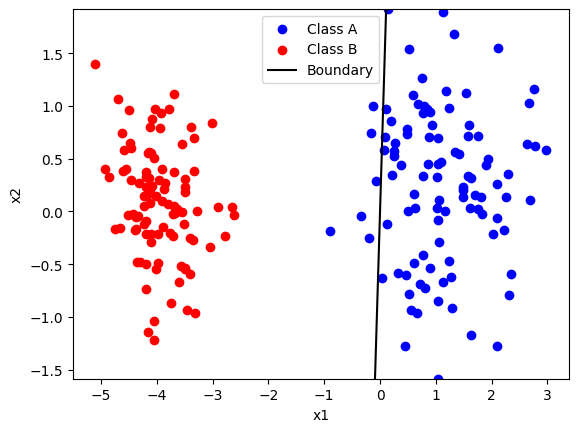

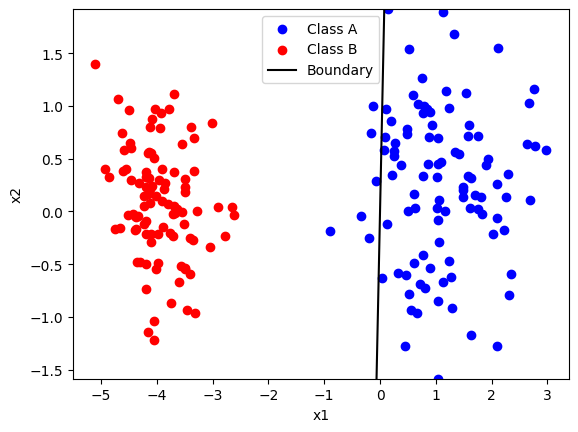

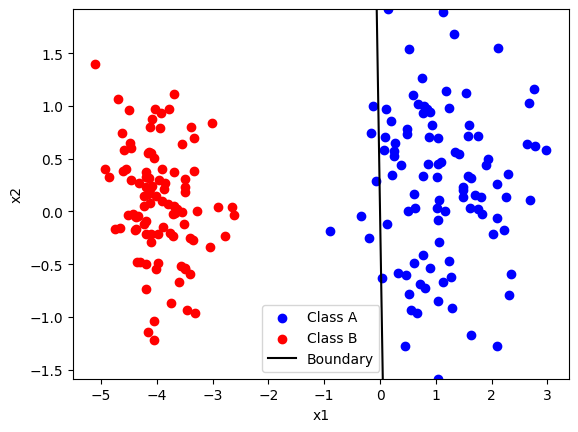

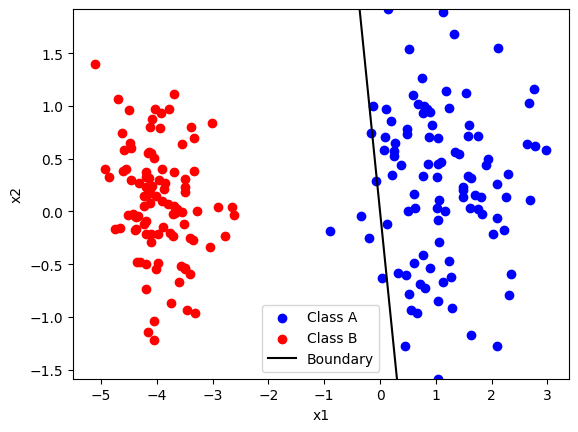

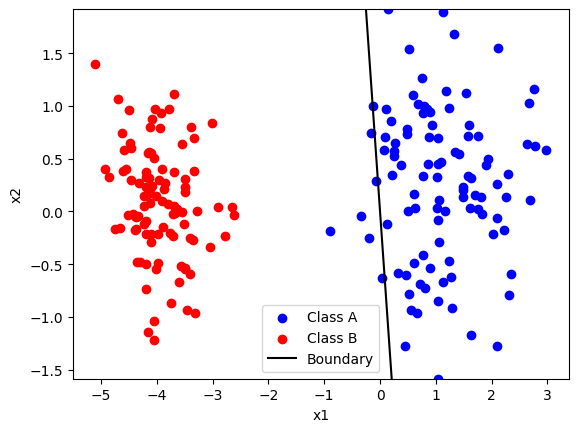

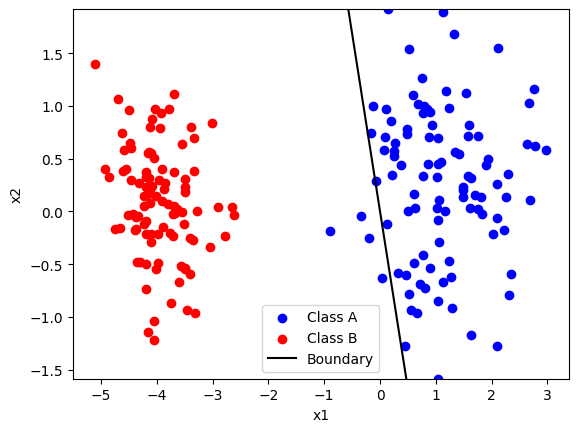

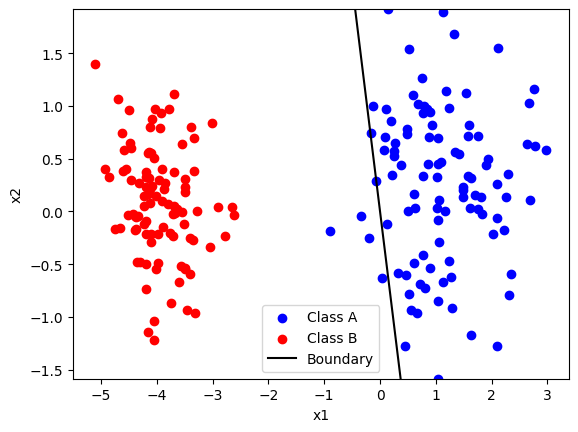

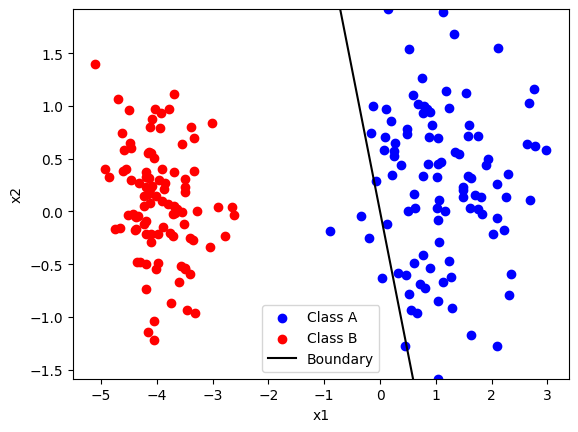

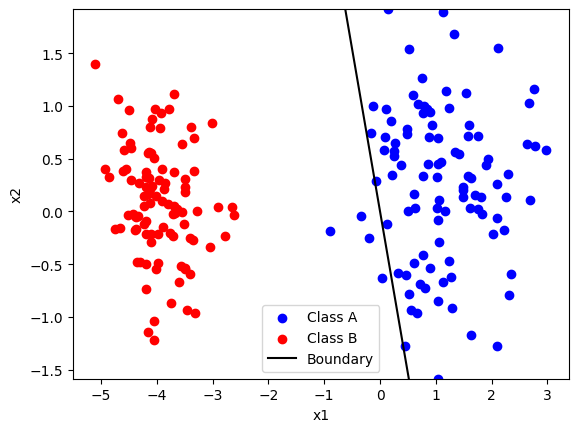

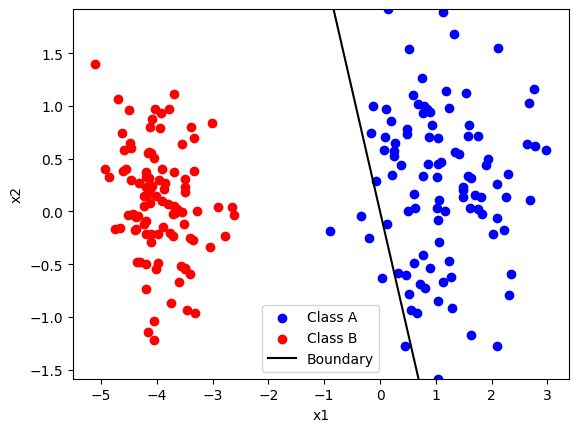

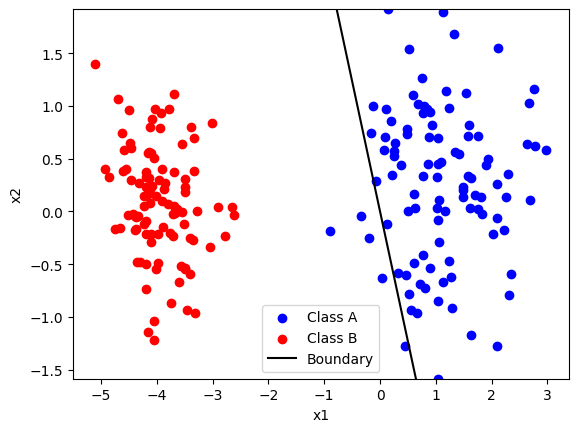

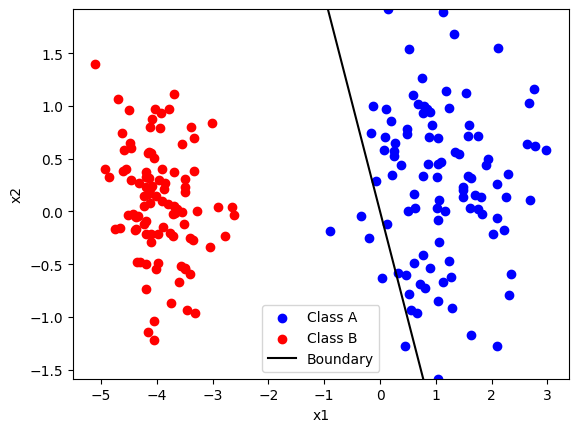

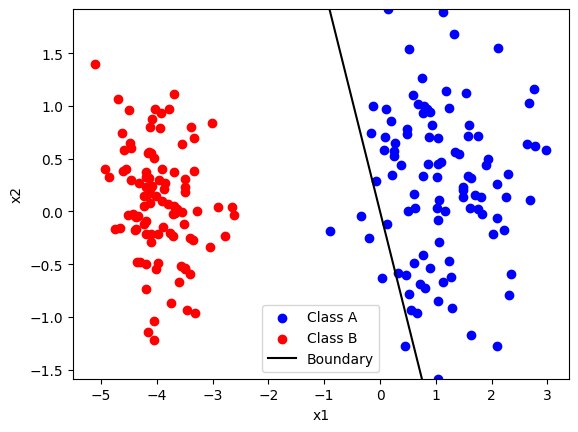

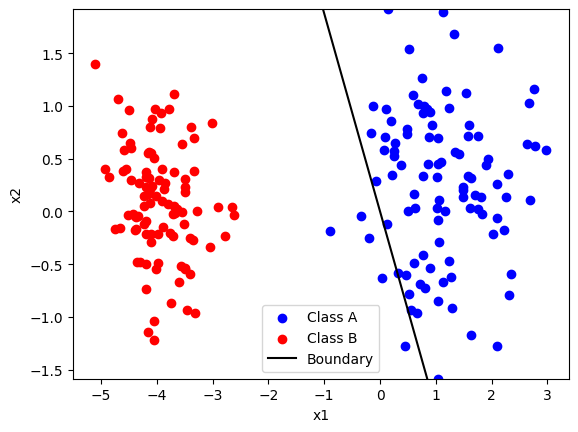

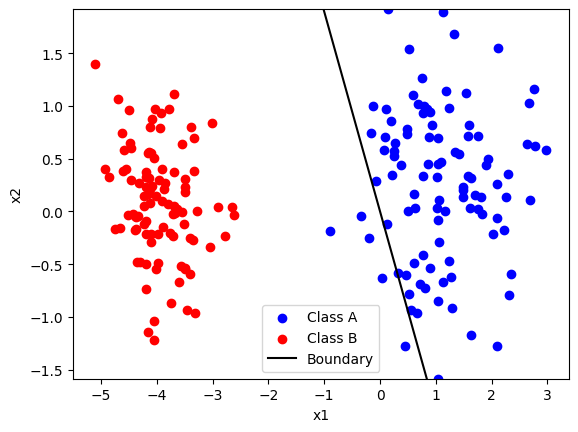

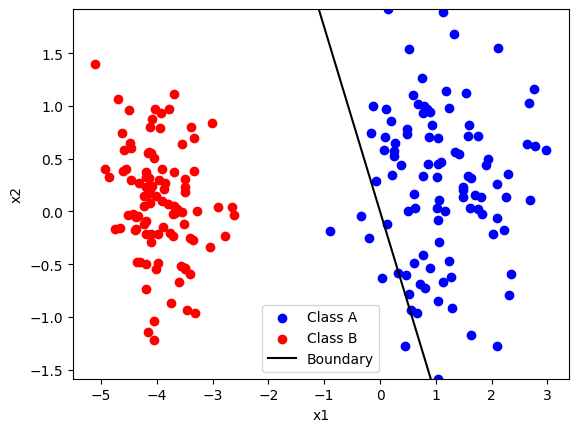

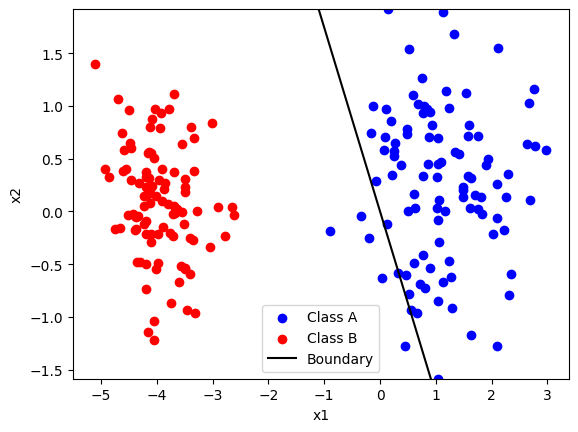

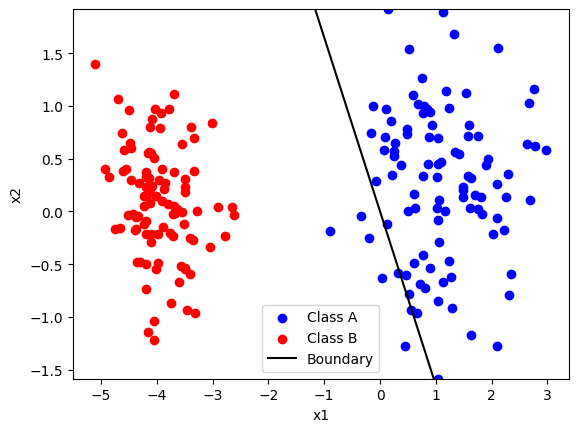

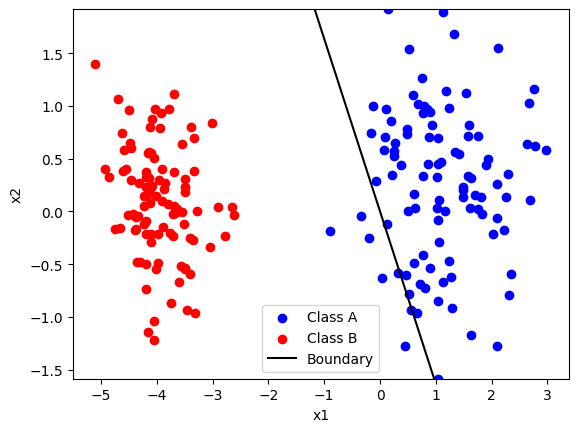

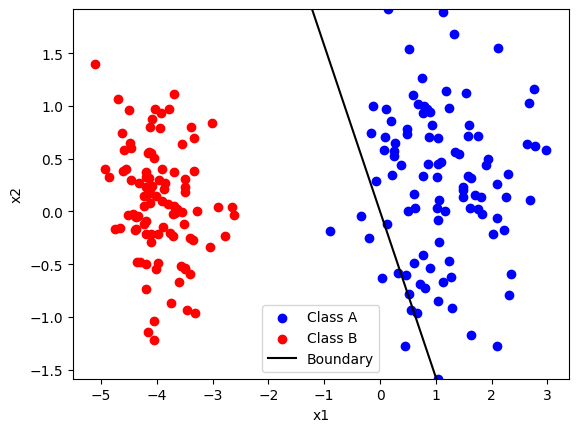

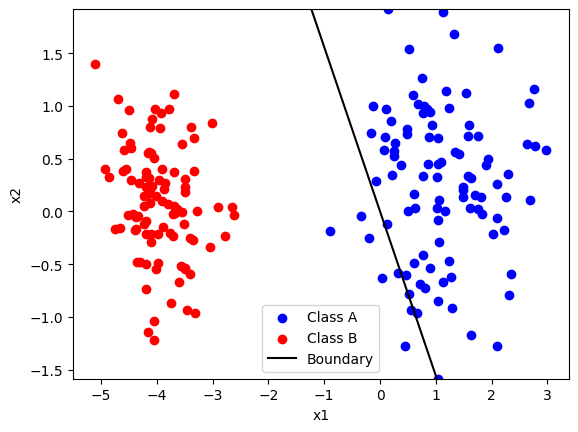

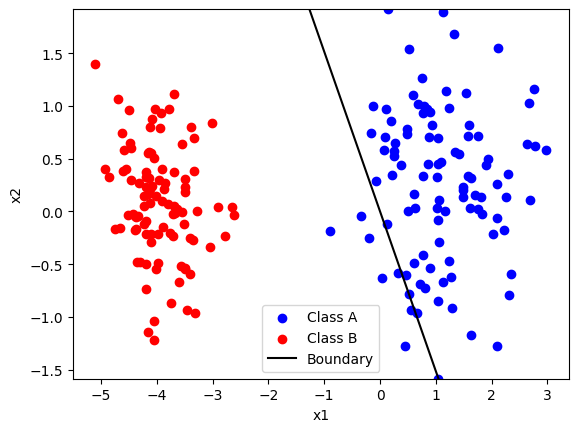

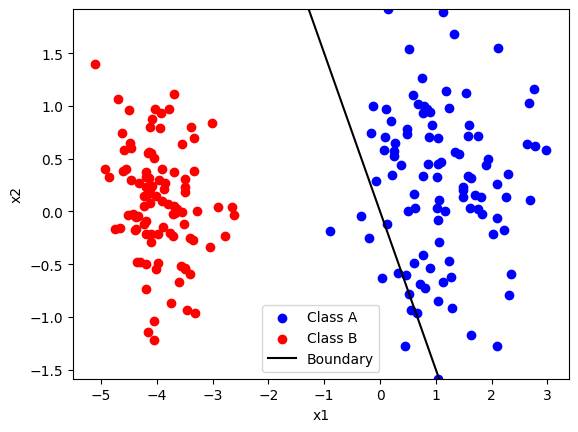

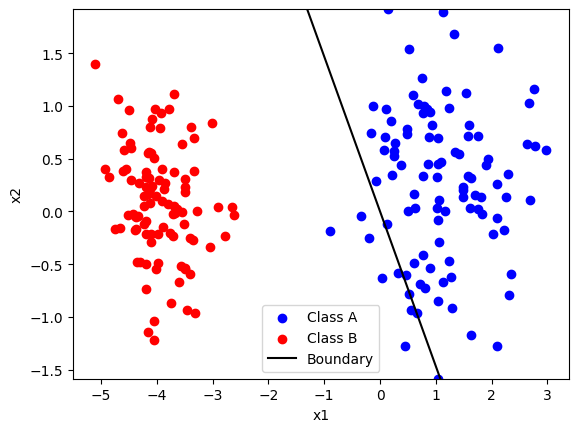

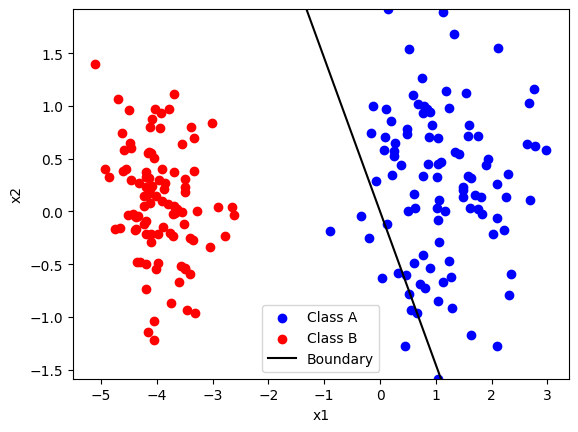

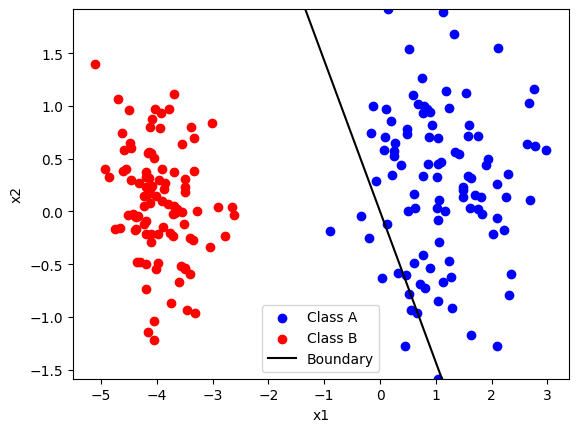

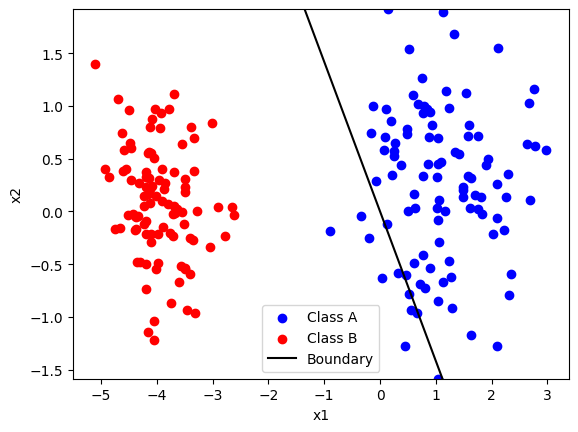

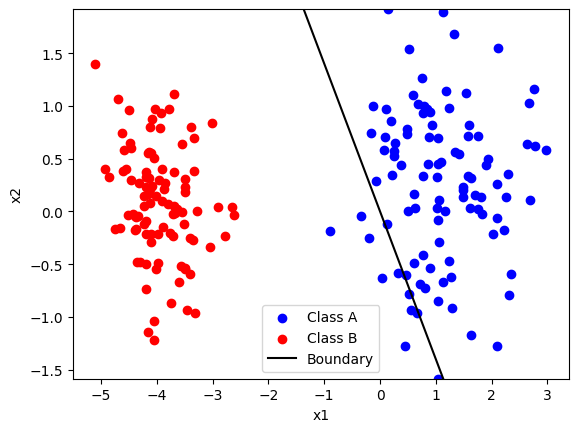

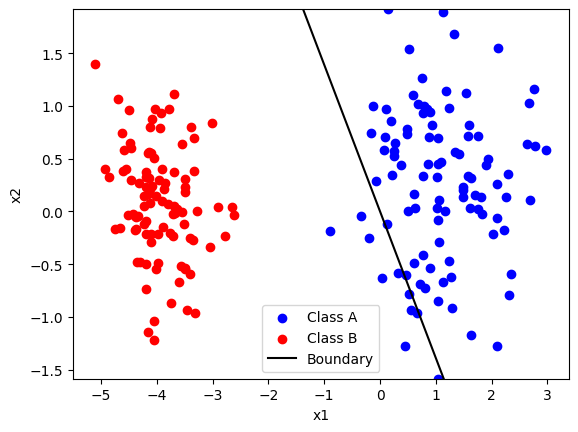

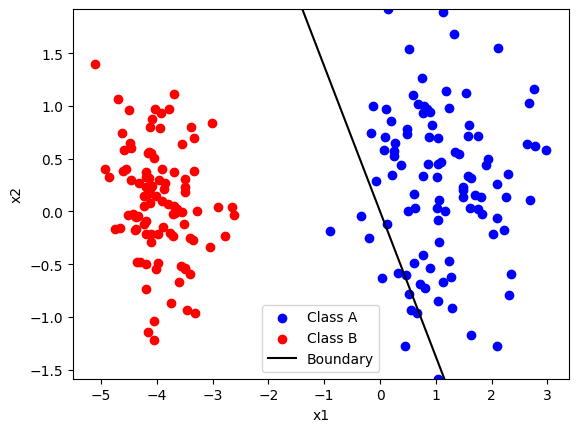

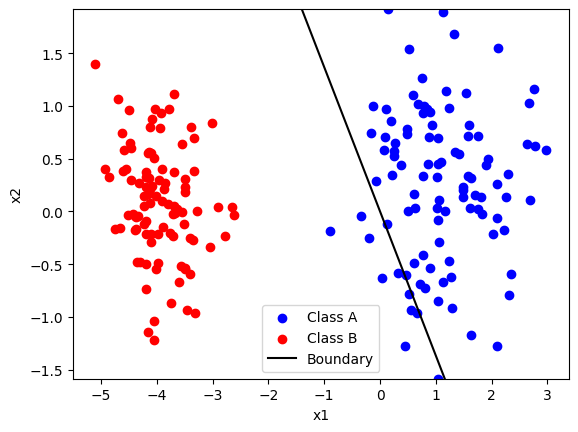

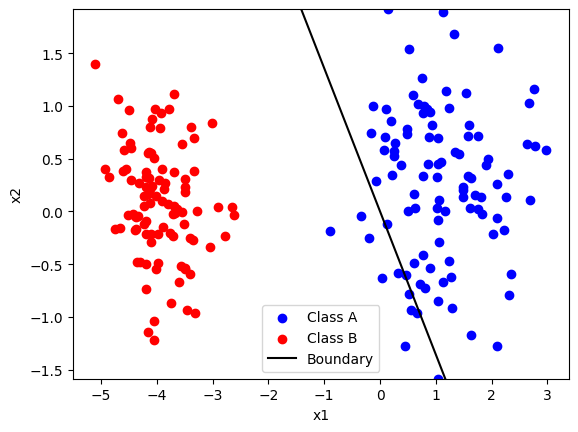

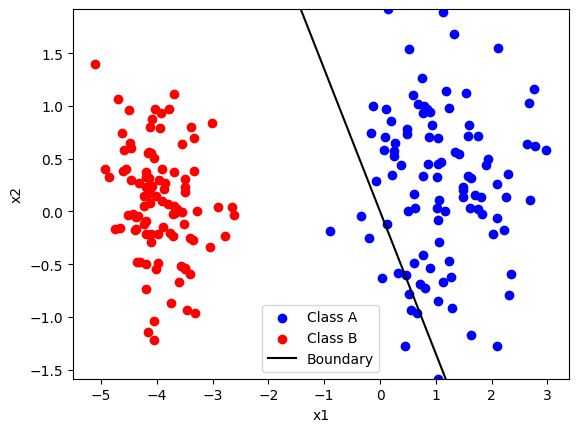

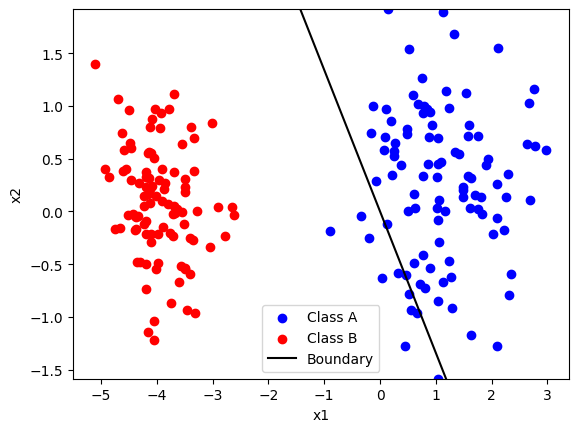

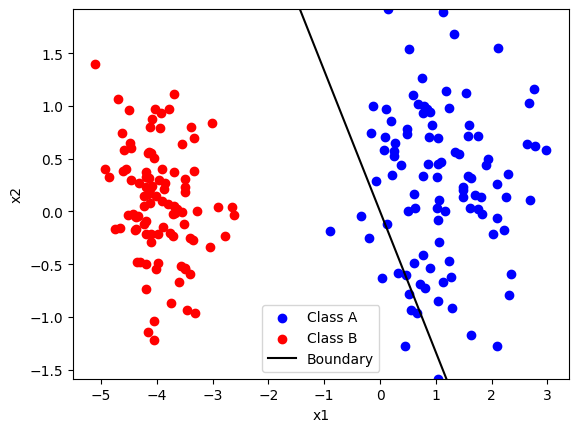

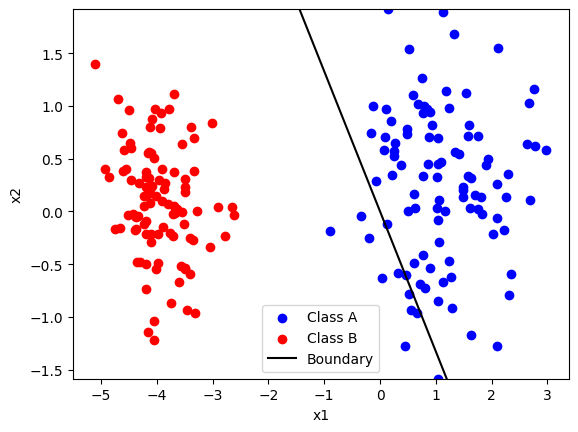

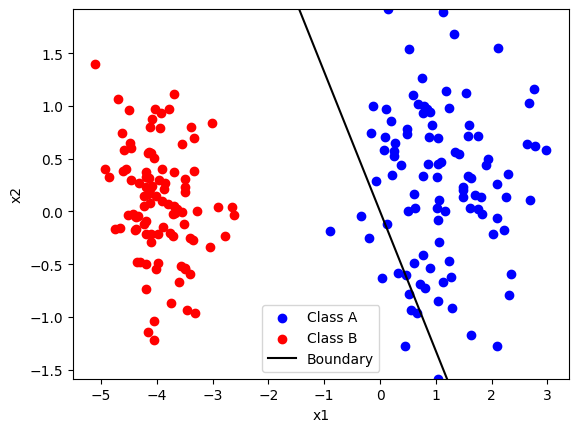

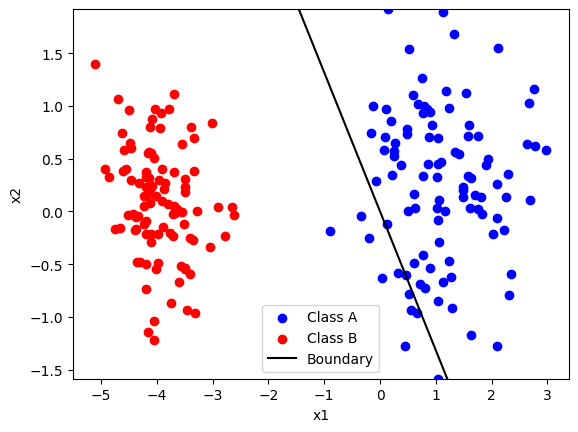

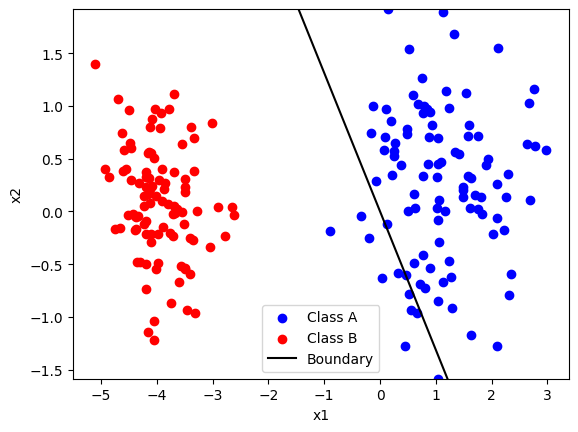

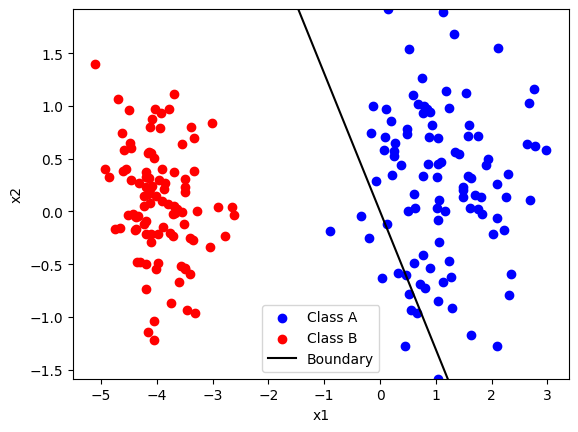

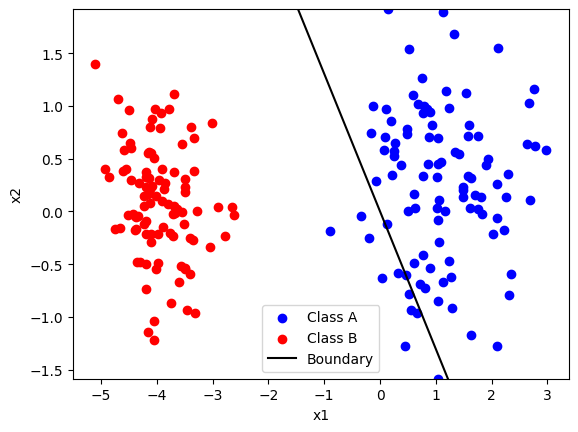

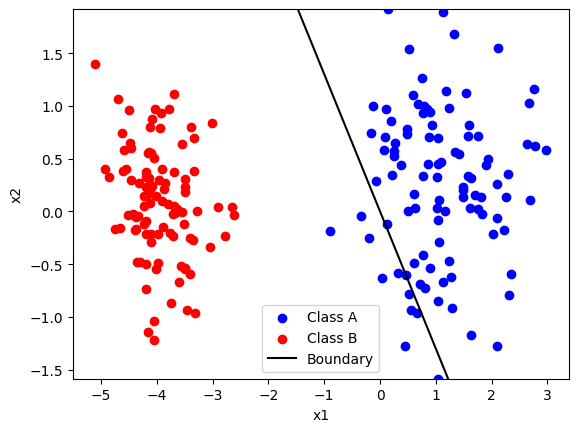

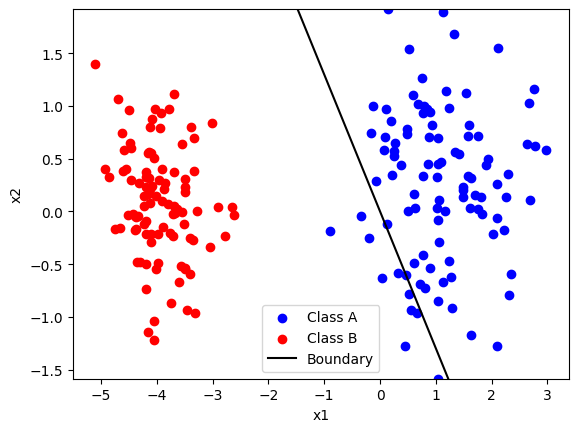

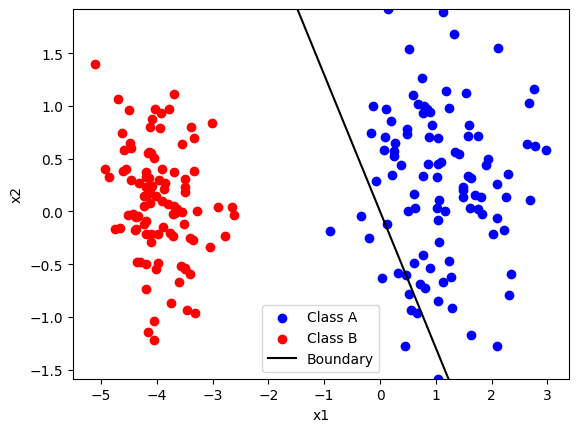

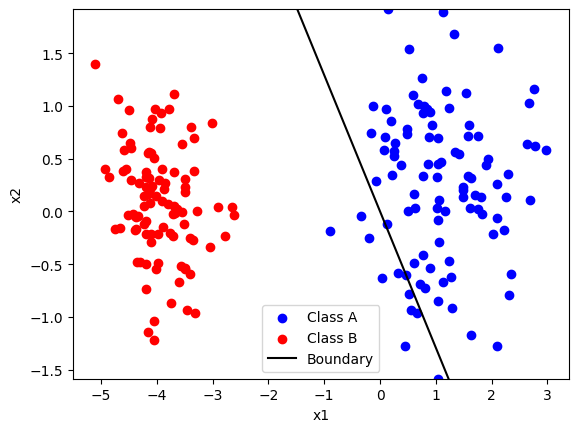

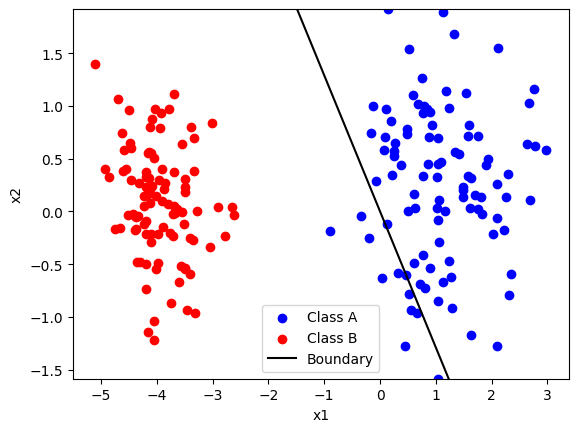

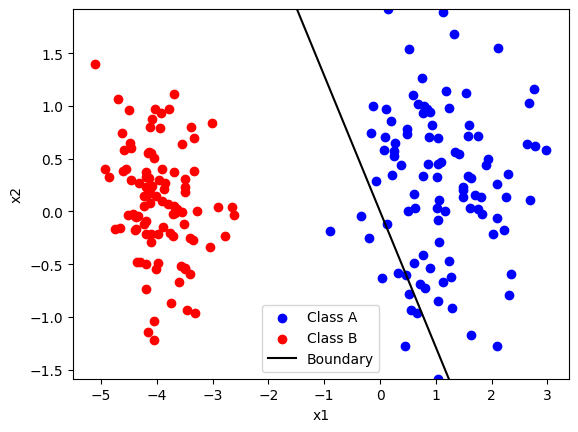

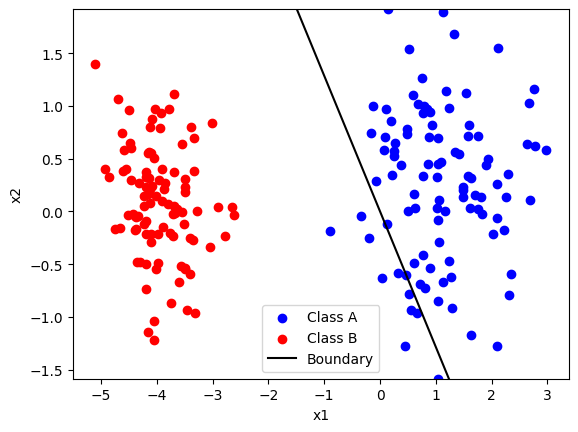

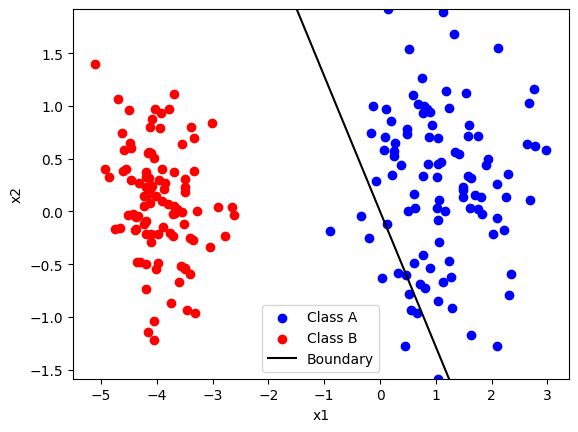

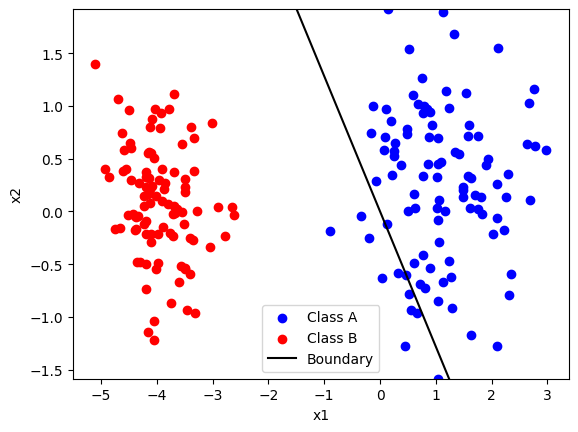

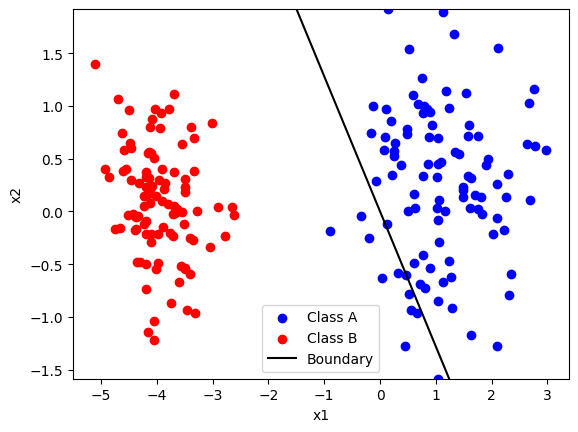

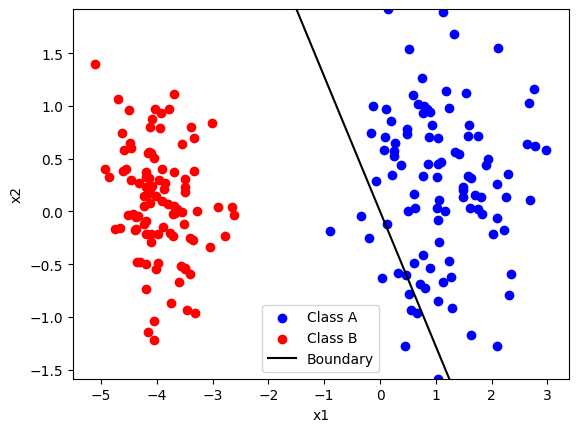

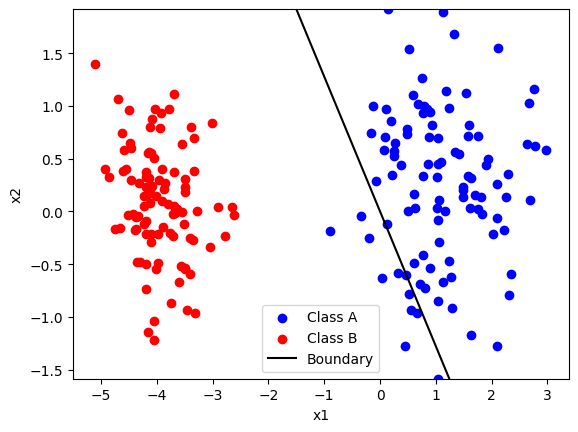

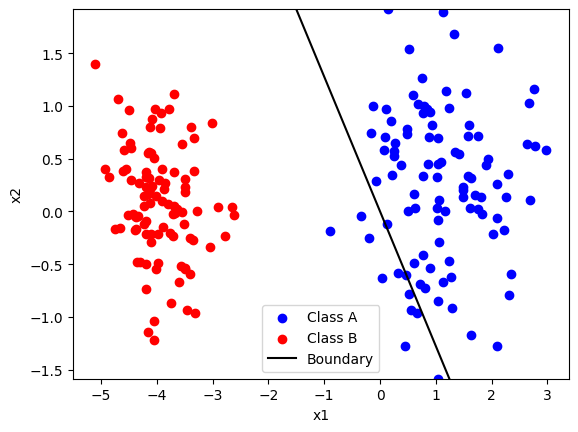

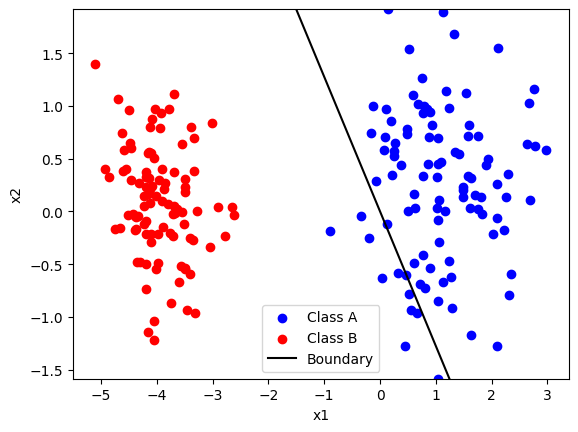

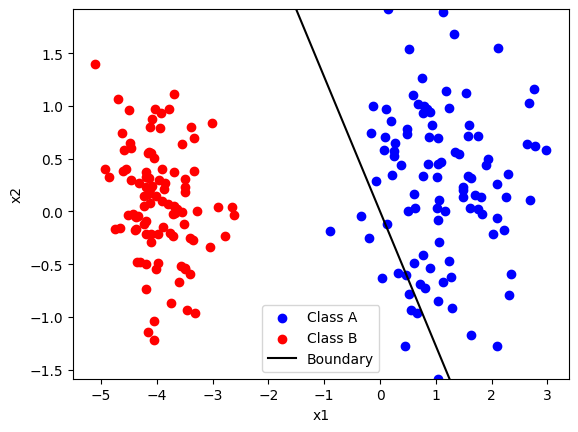

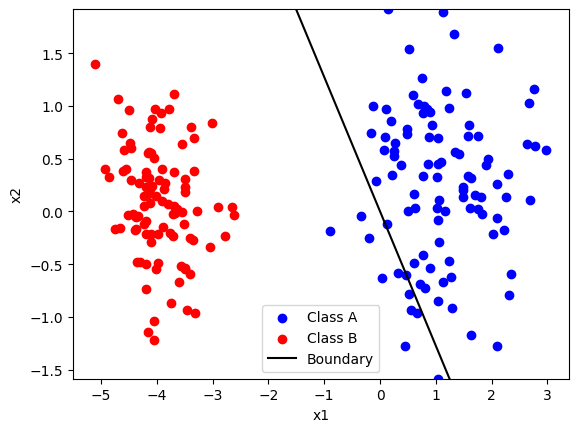

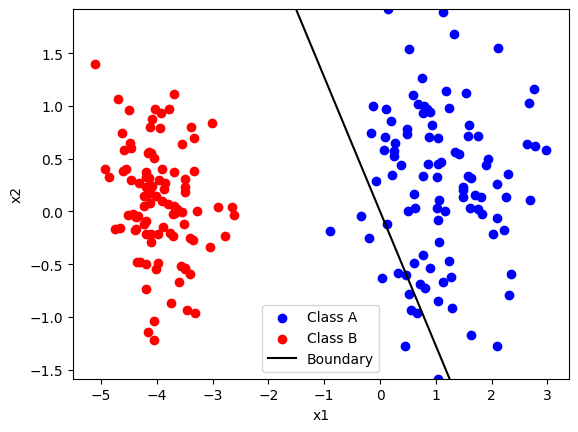

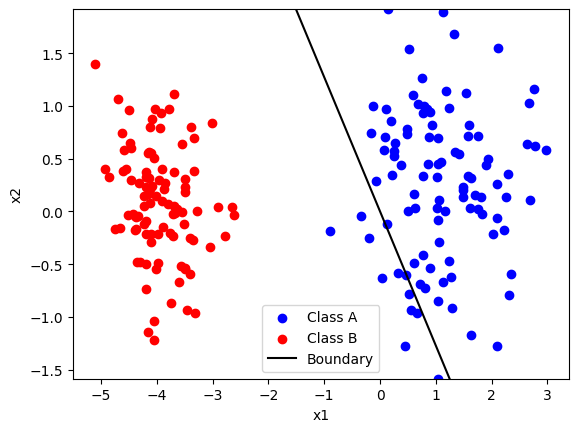

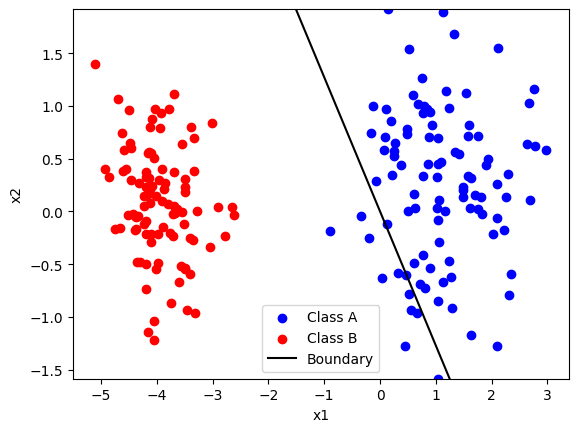

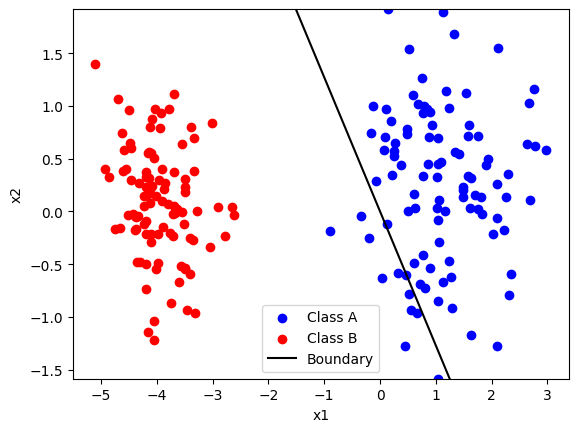

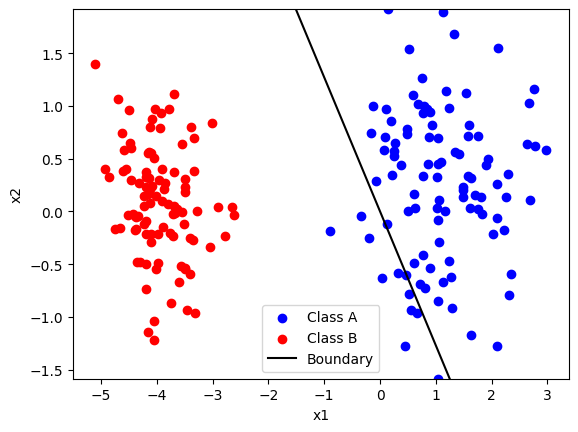

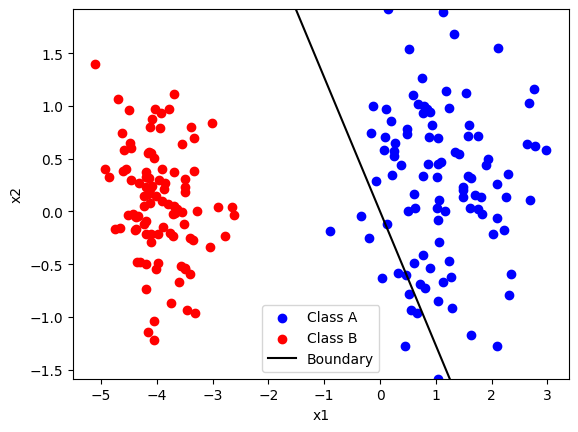

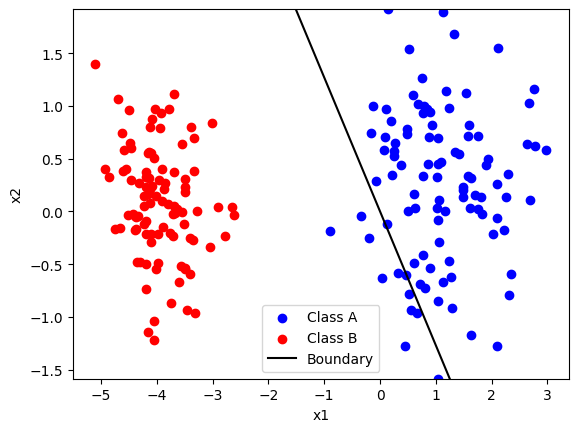

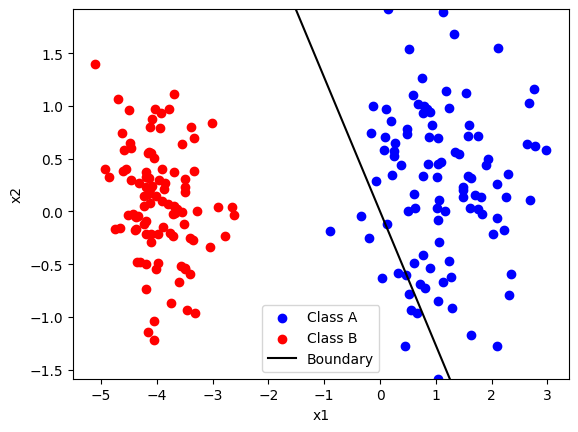

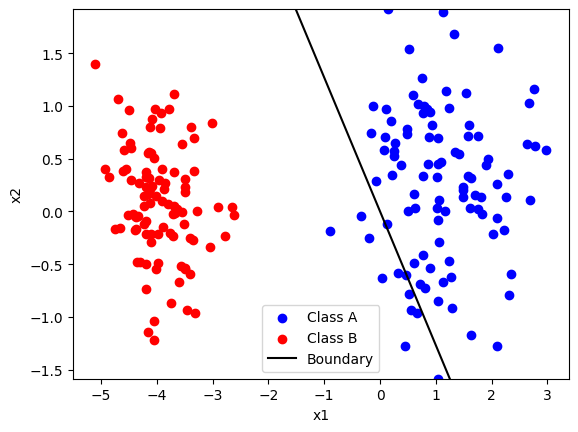

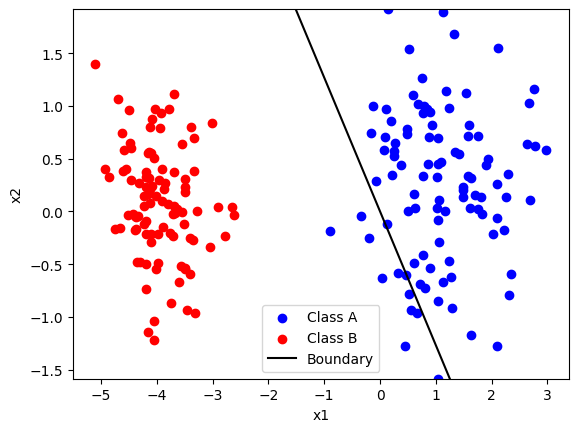

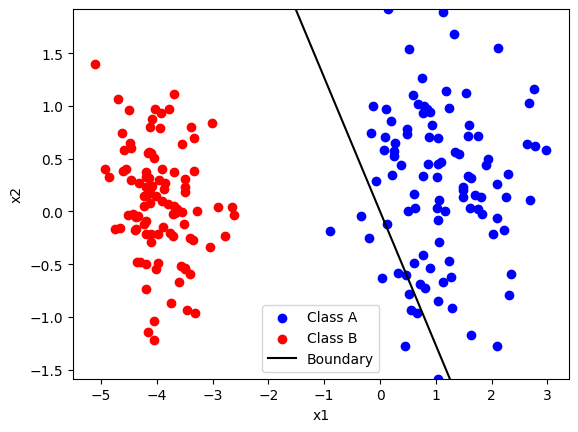

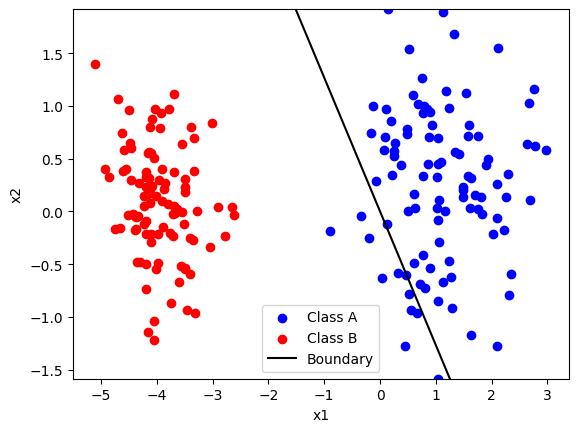

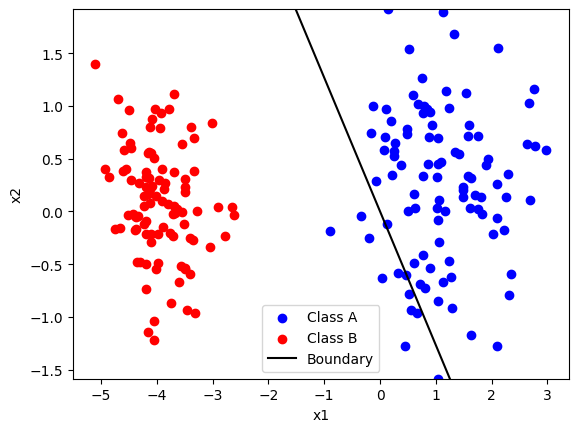

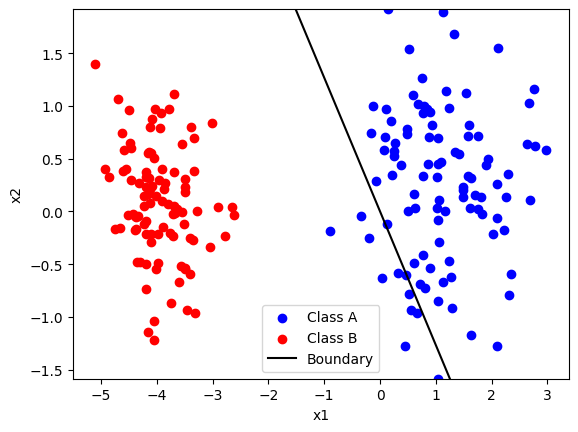

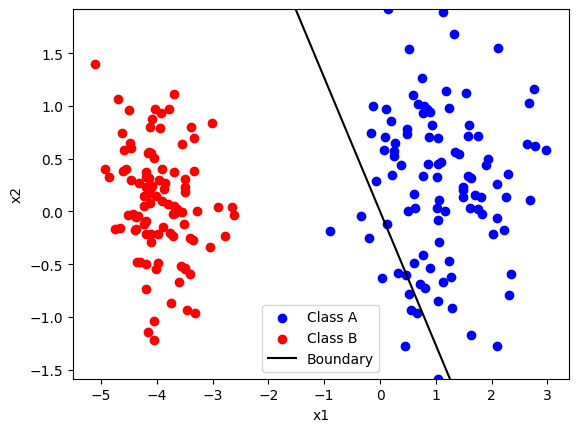

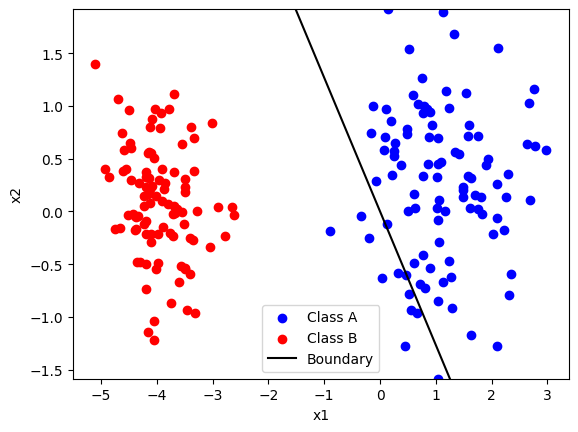

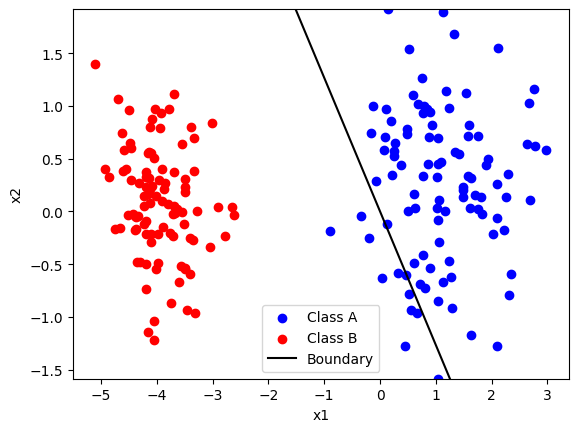

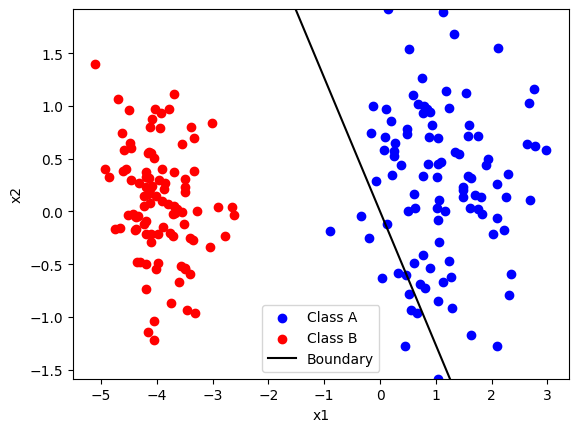

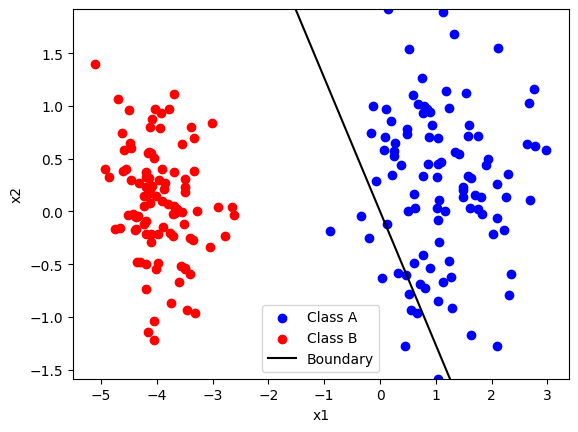

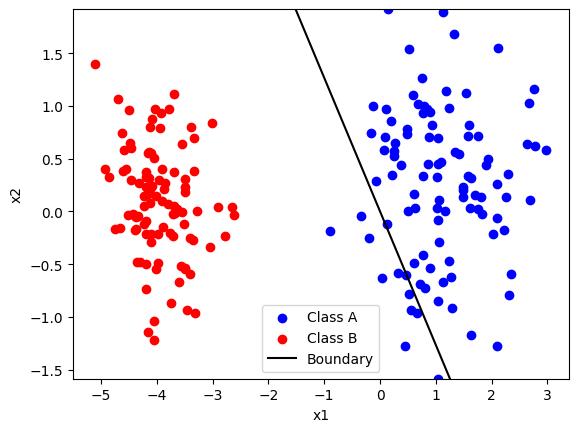

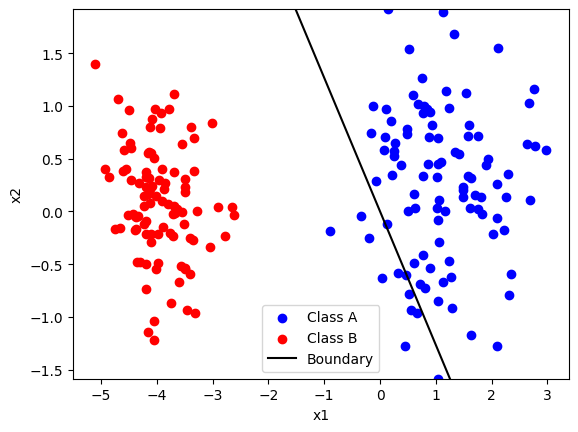

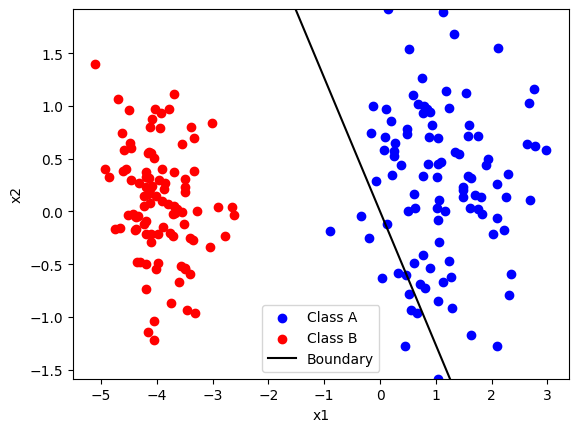

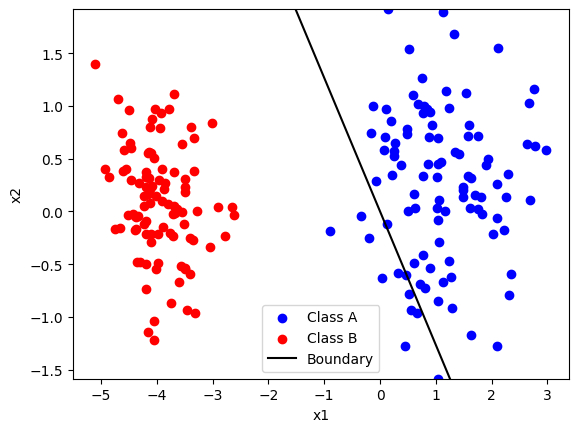

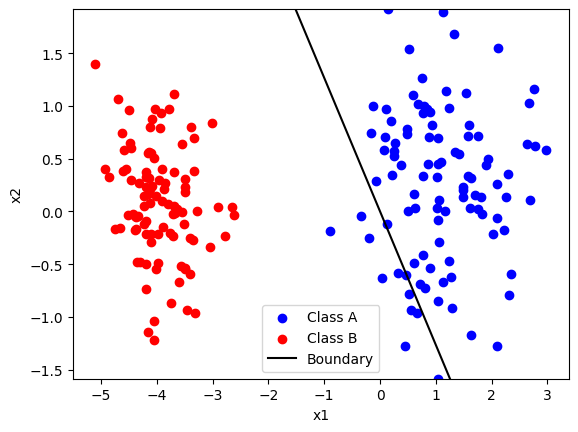

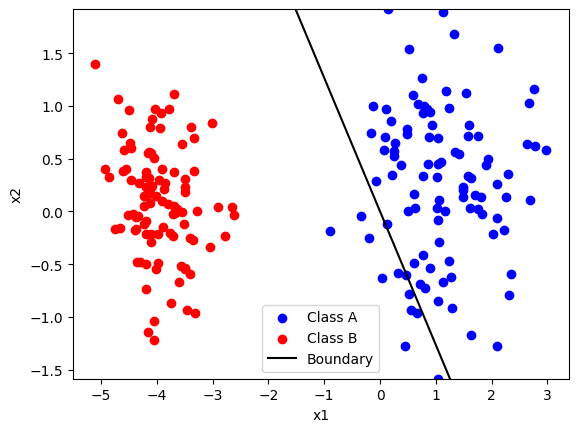

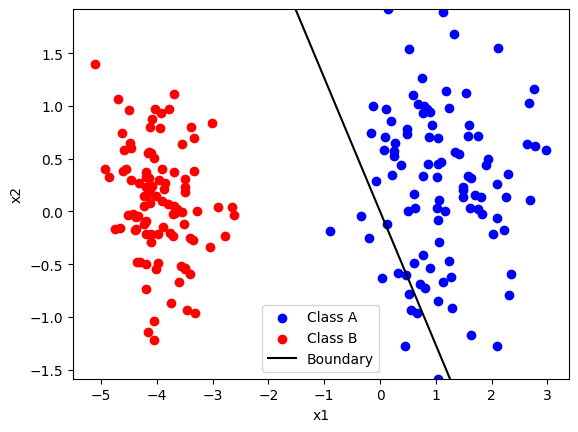

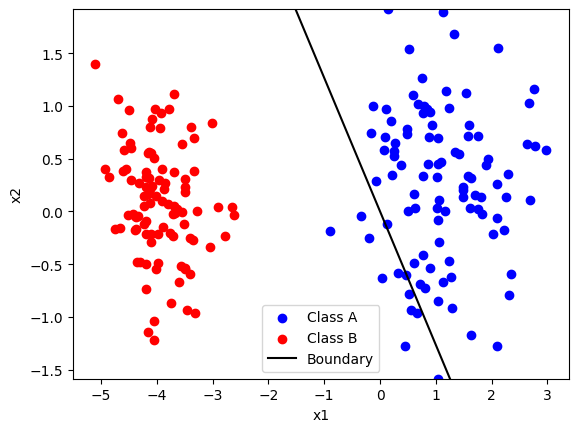

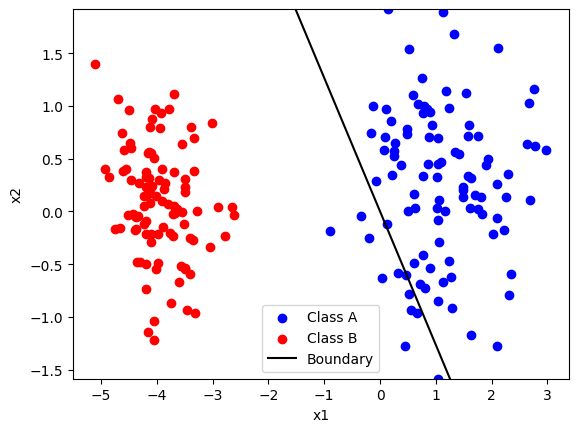

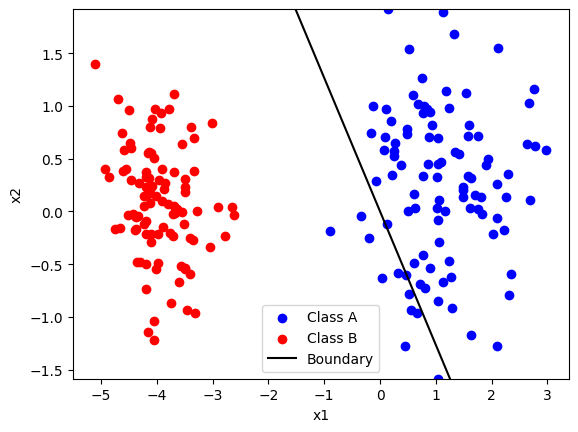

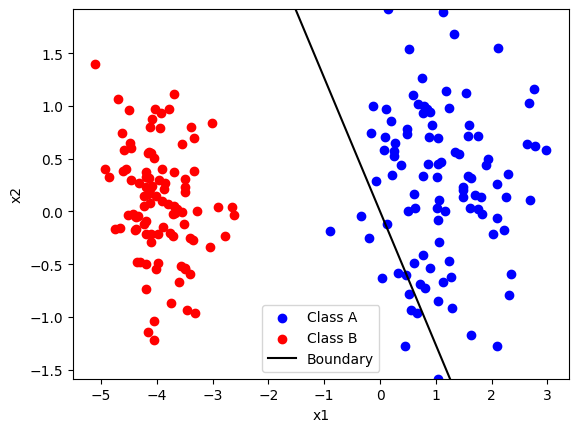

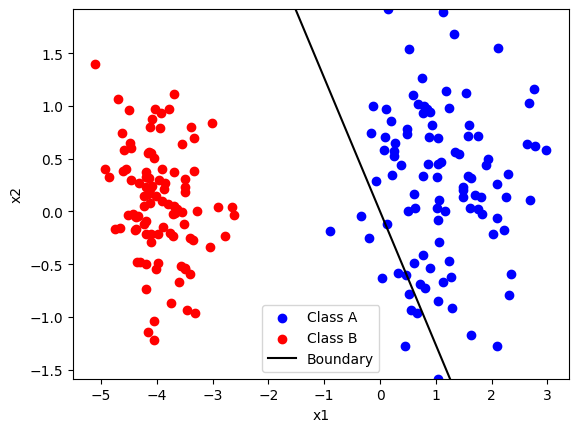

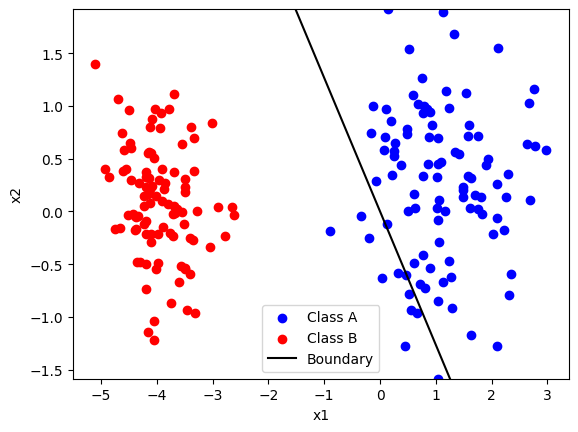

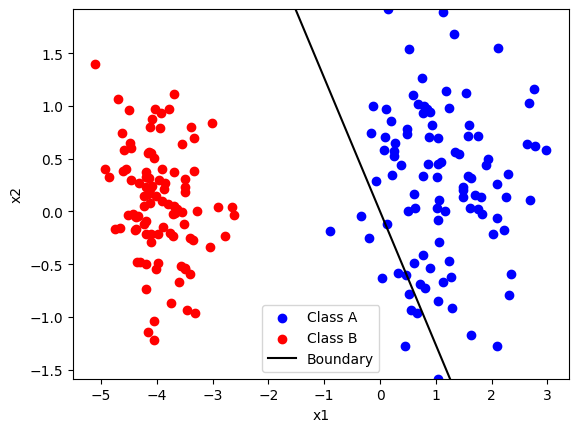

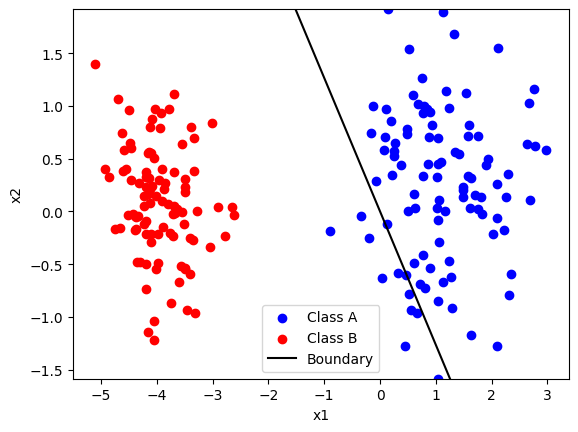

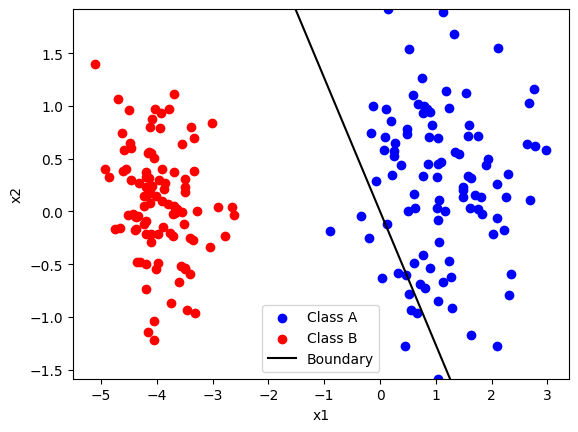

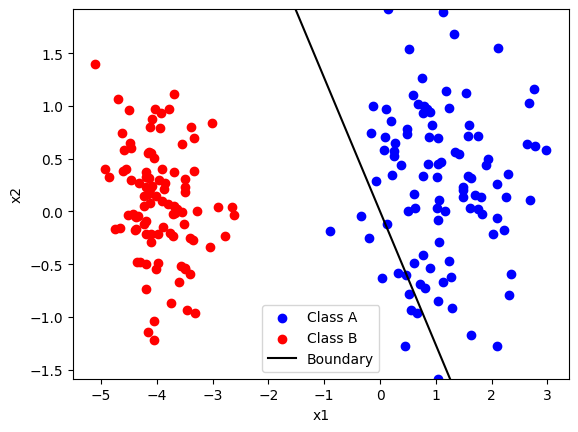

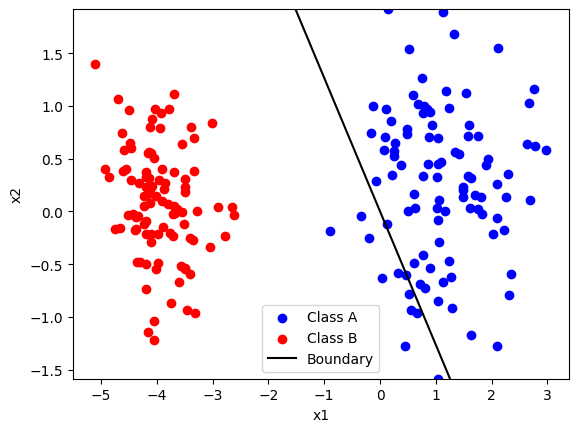

In [82]:
# Without the bias. Ran with mA = [1.0, 1.0] mB = [-4.0, 1.0]
w_delta_batch, _, loss_delta_batch= delta_rule_batch(epoch=100,x=patterns_shuffled_wo_bias, y=targetsDelta_shuffled, create_plot = True)

## Delta rule batch mode without bias (instance where it would be able to classify all data points correct)

In [83]:
import numpy as np
np.random.seed(42)

n = 100

# create synthetic data points, e.g. they are linearly seperable from the origin

theta = np.deg2rad(35)                 
w_dir = np.array([np.cos(theta), np.sin(theta)])  
d = 2.5                                


mA = +d * w_dir        
mB = -d * w_dir        

sigmaA = 0.8
sigmaB = 0.8

classA = np.random.randn(n, 2) * sigmaA + mA
classB = np.random.randn(n, 2) * sigmaB + mB
 
classA = classA.transpose()
classB = classB.transpose()


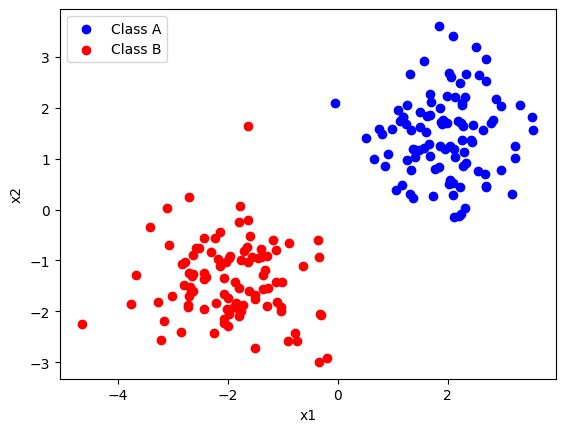

In [84]:
import matplotlib.pyplot as plt

plt.scatter(classA[0, :], classA[1, :], color="blue", label="Class A")
plt.scatter(classB[0, :], classB[1, :], color="red", label="Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [85]:
# Create input data, with bias term (one extra dimension)
classABias = np.concatenate((classA, np.ones((1, n))), axis=0)
classBBias = np.concatenate((classB, np.ones((1, n))), axis=0)

# This is our input data (2 classes, with 2 dimensions for visualizatio in 2D plane + 1 deminsion for the bias term)
patterns = np.concatenate((classABias, classBBias), axis=1)

# Create shuffled indices. Will be used to shuffle the samples
shuffled_indices = np.random.permutation(patterns.shape[1])

# Shuffle Input data
patterns_shuffled = patterns[:, shuffled_indices]

# Target data (delta rule)
targetsDelta = np.concatenate((np.ones(classA.shape[1]), -np.ones(classB.shape[1])))
targetsDelta_shuffled = targetsDelta[shuffled_indices] # Shuffle targets

#remove bias
patterns_shuffled_wo_bias = patterns_shuffled[0:2, :]


In [86]:

w_delta_batch, _, loss_delta_batch= delta_rule_batch(epoch=100,x=patterns_shuffled_wo_bias, y=targetsDelta_shuffled, create_plot = False)

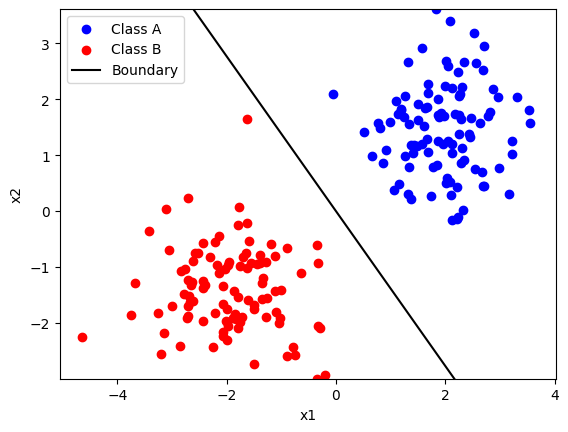

In [87]:
plot_classifier(classA,classB, w_delta_batch)

## Non linear data samples

In [88]:
n = 100
mA = [1.0, 0.3]
mB = [0.0, -0.1]
sigmaA = 0.2
sigmaB = 0.3

classA_1 = np.concatenate((
    np.random.randn(int(n/2), 1) * sigmaA + mA[0], 
    np.random.randn(int(n/2), 1) * sigmaA - mA[0])
)
classA = np.concatenate((classA_1, np.random.randn(n, 1) * sigmaA + mA[1]), axis=1) 
classB = np.random.randn(n, 2) * sigmaB + mB

classA = classA.transpose()
classB = classB.transpose()

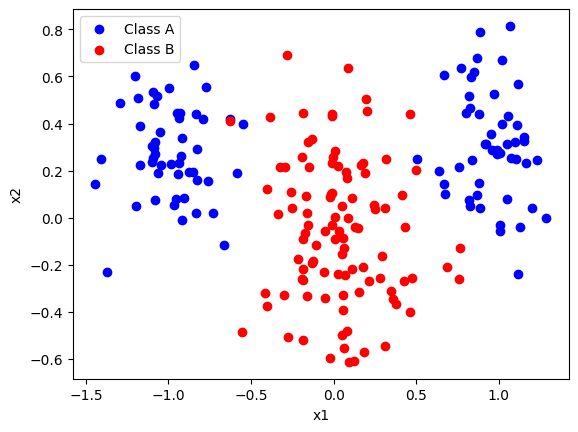

In [89]:
plt.scatter(classA[0, :], classA[1, :], color="blue", label="Class A")
plt.scatter(classB[0, :], classB[1, :], color="red", label="Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [90]:
# Create input data, with bias term (one extra dimension)
classABias = np.concatenate((classA, np.ones((1, n))), axis=0)
classBBias = np.concatenate((classB, np.ones((1, n))), axis=0)

# This is our input data (2 classes, with 2 dimensions for visualizatio in 2D plane + 1 deminsion for the bias term)
patterns = np.concatenate((classABias, classBBias), axis=1)

# Create shuffled indices. Will be used to shuffle the samples
shuffled_indices = np.random.permutation(patterns.shape[1])

# Shuffle Input data
patterns_shuffled = patterns[:, shuffled_indices]

# Target data (delta rule)
targetsDelta = np.concatenate((np.ones(classA.shape[1]), -np.ones(classB.shape[1])))
targetsDelta_shuffled = targetsDelta[shuffled_indices] # Shuffle targets

# Target data (perceptron rule)
targetsPerc = np.concatenate((np.ones(classA.shape[1]), np.zeros(classB.shape[1])))
targetsPerc_shuffled = targetsPerc[shuffled_indices] # Shuffle targets

### Random 25% from each class

In [91]:
# To remove
nn = int(2*n*0.25)
# Create shuffled indices. Will be used to shuffle the samples
shuffled_indices = np.random.permutation(int(2*n*0.75))
# Choose random 75% or 50% of a sample
sample_25 = np.random.choice(n, size=int(n*0.75), replace=False)
sample_50 = np.random.choice(n, size=int(n*0.5), replace=False)

sample_A1 = np.random.choice(int(n/2), size=int(nn*0.8), replace=False)
sample_A0 = np.random.choice(int(n/2), size=int(nn*0.2), replace=False) + int(n/2)

# This is our input data (2 classes, with 2 dimensions for visualizatio in 2D plane + 1 deminsion for the bias term)
patterns_25 = np.concatenate((classABias[:, sample_25], classBBias[:, sample_25]), axis=1)
patterns_50A = np.concatenate((classABias[:, sample_50], classBBias), axis=1)
patterns_50B = np.concatenate((classABias, classBBias[:, sample_50]), axis=1)

classA_subset = np.concatenate((classABias[:, sample_A0], classABias[:, sample_A1]), axis=1)
patterns_A = np.concatenate((classA_subset, classBBias), axis=1)

# Shuffle Input data
patterns_shuffled_25 = patterns_25[:, shuffled_indices]
patterns_shuffled_50A = patterns_50A[:, shuffled_indices]
patterns_shuffled_50B = patterns_50B[:, shuffled_indices]
patterns_shuffled_A = patterns_A[:, shuffled_indices]

# Target data (delta rule)
targetsDelta = np.concatenate((np.ones(classA.shape[1]), -np.ones(classB.shape[1])))

targetsDelta_25 = np.concatenate((np.ones(int(n*0.75)), -np.ones(int(n*0.75))))
targetsDelta_shuffled_25 = targetsDelta_25[shuffled_indices] # Shuffle targets

targetsDelta_50A = np.concatenate((np.ones(int(n*0.5)), -np.ones(n)))
targetsDelta_shuffled_50A = targetsDelta_50A[shuffled_indices] # Shuffle targets

targetsDelta_50B = np.concatenate((np.ones(n), -np.ones(int(n*0.5))))
targetsDelta_shuffled_50B = targetsDelta_50B[shuffled_indices] # Shuffle targets

targetsDelta_A = np.concatenate((np.ones(int(n*0.5)), -np.ones(n)))
targetsDelta_shuffled_A = targetsDelta_A[shuffled_indices] # Shuffle targets

# Target data (perceptron rule)
targetsPerc_25 = np.concatenate((np.ones(int(n*0.75)), np.zeros(int(n*0.75))))
targetsPerc_shuffled_25 = targetsPerc_25[shuffled_indices] # Shuffle targets

targetsPerc_50A = np.concatenate((np.ones(int(n*0.5)), np.zeros(n)))
targetsPerc_shuffled_50A = targetsPerc_50A[shuffled_indices] # Shuffle targets

targetsPerc_50B = np.concatenate((np.ones(n), np.zeros(int(n*0.5))))
targetsPerc_shuffled_50B = targetsPerc_50B[shuffled_indices] # Shuffle targets

targetsPerc_A = np.concatenate((np.ones(int(n*0.5)), np.zeros(n)))
targetsPerc_shuffled_A = targetsPerc_A[shuffled_indices] # Shuffle targets


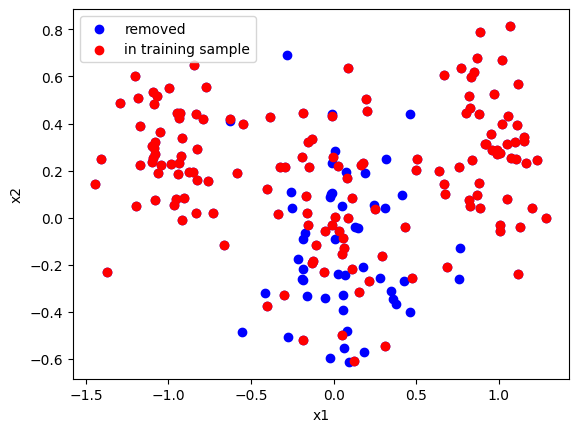

In [92]:
# Sample test
plt.scatter(patterns[0, :], patterns[1, :], color="blue", label="removed")
plt.scatter(patterns_50B[0, :], patterns_50B[1, :], color="red", label="in training sample")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [93]:
# Perceptron check
#w, counter = perceptron_rule(x=patterns_shuffled_25, y=targetsPerc_shuffled_25, create_plot=True)

In [94]:
w_delta_online_25, _, loss_delta_online_25=delta_rule_online(epoch=100,x=patterns_shuffled_25, y=targetsDelta_shuffled_25, create_plot= False, eta=0.01)
w_delta_batch_25, _, loss_delta_batch_25= delta_rule_batch(epoch=100,x=patterns_shuffled_25, y=targetsDelta_shuffled_25, create_plot = False)

w_delta_online_50A, _, loss_delta_online_50A=delta_rule_online(epoch=100,x=patterns_shuffled_50A, y=targetsDelta_shuffled_50A, create_plot= False, eta=0.01)
w_delta_batch_50A, _, loss_delta_batch_50A= delta_rule_batch(epoch=100,x=patterns_shuffled_50A, y=targetsDelta_shuffled_50A, create_plot = False)

w_delta_online_50B, _, loss_delta_online_50B=delta_rule_online(epoch=100,x=patterns_shuffled_50B, y=targetsDelta_shuffled_50B, create_plot= False, eta=0.01)
w_delta_batch_50B, _, loss_delta_batch_50B= delta_rule_batch(epoch=100,x=patterns_shuffled_50B, y=targetsDelta_shuffled_50B, create_plot = False)

w_delta_online_A, _, loss_delta_online_A=delta_rule_online(epoch=100,x=patterns_shuffled_A, y=targetsDelta_shuffled_A, create_plot= False, eta=0.01)
w_delta_batch_A, _, loss_delta_batch_A= delta_rule_batch(epoch=100,x=patterns_shuffled_A, y=targetsDelta_shuffled_A, create_plot = False)

In [95]:
def plot_bound(classA, classB, training, w_delta_batch, w_delta_online, title):
    delta_bound_online = calculate_boundary(w_delta_online)
    delta_bound_batch=calculate_boundary(w_delta_batch)
    plt.scatter(classA[0, :], classA[1, :], color="blue", label="Class A")
    plt.scatter(classB[0, :], classB[1, :], color="red", label="Class B")
    plt.scatter(training[0, :], training[1, :], color="yellow", label="in training sample", marker="1")
    plt.plot(delta_bound_batch[0],delta_bound_batch[1], color="black", label="Delta Batch Boundary")
    plt.plot(delta_bound_online[0],delta_bound_online[1], color="orange", label="Delta Online Boundary")
    #plt.ylim(classA[1, :].min(), classA[1, :].max())
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.title(title)
    plt.show()

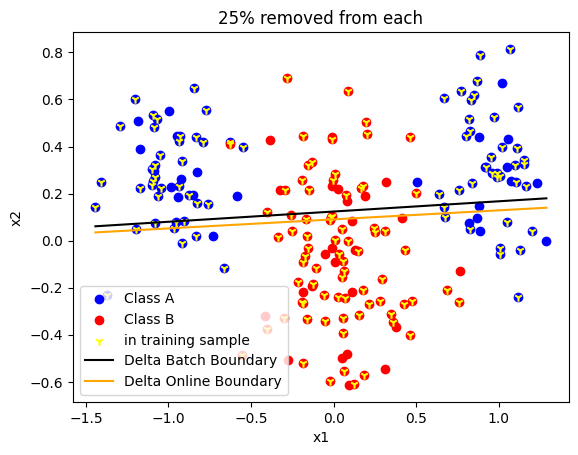

Training accuracy batch: 74.67%
Training accuracy online: 76.00%
Total accuracy batch: 74.00%
Total accuracy online: 75.50%


In [110]:
from helper_functions import accuracy
plot_bound(classA, classB, patterns_25, w_delta_batch_25, w_delta_online_25, "25% removed from each")
print("Training accuracy batch: {:.2f}%".format(100 * accuracy(patterns_25, targetsDelta_25, w_delta_batch_25)))
print("Training accuracy online: {:.2f}%".format(100 * accuracy(patterns_25, targetsDelta_25, w_delta_online_25)))
print("Total accuracy batch: {:.2f}%".format(100 * accuracy(patterns, targetsDelta, w_delta_batch_25)))
print("Total accuracy online: {:.2f}%".format(100 * accuracy(patterns, targetsDelta, w_delta_online_25)))

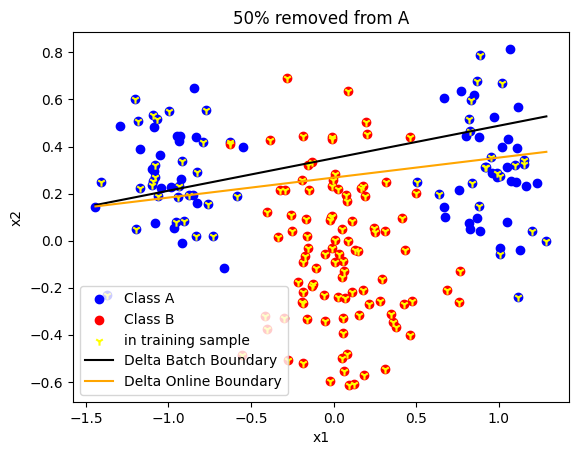

Training accuracy batch: 74.67%
Training accuracy online: 74.67%
Total accuracy batch: 66.50%
Total accuracy online: 69.00%


In [111]:
plot_bound(classA, classB, patterns_50A, w_delta_batch_50A, w_delta_online_50A, "50% removed from A")
print("Training accuracy batch: {:.2f}%".format(100 * accuracy(patterns_50A, targetsDelta_50A, w_delta_batch_50A)))
print("Training accuracy online: {:.2f}%".format(100 * accuracy(patterns_50A, targetsDelta_50A, w_delta_online_50A)))
print("Total accuracy batch: {:.2f}%".format(100 * accuracy(patterns, targetsDelta, w_delta_batch_50A)))
print("Total accuracy online: {:.2f}%".format(100 * accuracy(patterns, targetsDelta, w_delta_online_50A)))

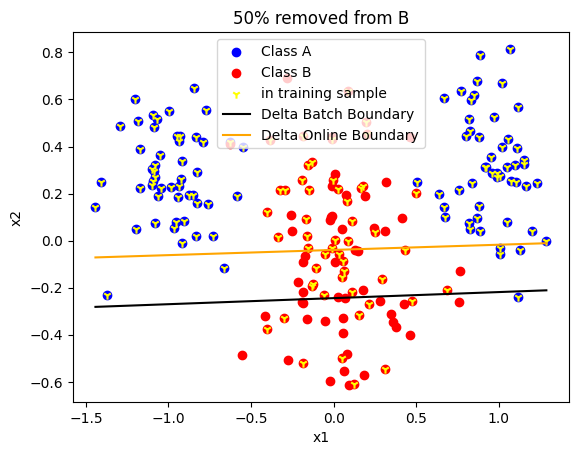

Training accuracy batch: 72.00%
Training accuracy online: 77.33%
Total accuracy batch: 65.00%
Total accuracy online: 74.00%


In [112]:
plot_bound(classA, classB, patterns_50B, w_delta_batch_50B, w_delta_online_50B, "50% removed from B")
print("Training accuracy batch: {:.2f}%".format(100 * accuracy(patterns_50B, targetsDelta_50B, w_delta_batch_50B)))
print("Training accuracy online: {:.2f}%".format(100 * accuracy(patterns_50B, targetsDelta_50B, w_delta_online_50B)))
print("Total accuracy batch: {:.2f}%".format(100 * accuracy(patterns, targetsDelta, w_delta_batch_50B)))
print("Total accuracy online: {:.2f}%".format(100 * accuracy(patterns, targetsDelta, w_delta_online_50B)))

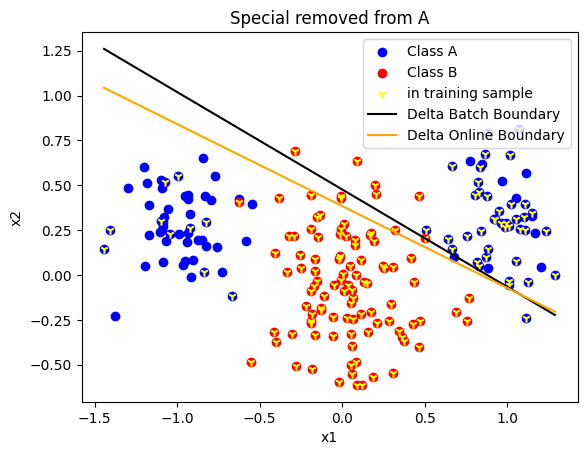

Training accuracy batch: 89.33%
Training accuracy online: 86.67%
Total accuracy batch: 71.50%
Total accuracy online: 70.00%


In [114]:
plot_bound(classA, classB, patterns_A, w_delta_batch_A, w_delta_online_A, "Special removed from A")
print("Training accuracy batch: {:.2f}%".format(100 * accuracy(patterns_A, targetsDelta_A, w_delta_batch_A)))
print("Training accuracy online: {:.2f}%".format(100 * accuracy(patterns_A, targetsDelta_A, w_delta_online_A)))
print("Total accuracy batch: {:.2f}%".format(100 * accuracy(patterns, targetsDelta, w_delta_batch_A)))
print("Total accuracy online: {:.2f}%".format(100 * accuracy(patterns, targetsDelta, w_delta_online_A)))

### 